   
   # Context Blocked response labeling


In [1]:
# Stimulus Fisrt Blocked task labeling  Multiplicative with real image of the insects
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow_datasets as tfds
import random

# Read DATA from CSV file
Stimulus_1_Input= pd.read_csv('D://OneDrive - UGent//Desktop//Mina//Simulation//Stimulus_First_Task1 - Copy.csv')
Stimulus_2_Input= pd.read_csv('D://OneDrive - UGent//Desktop//Mina//Simulation//Stimulus_First_Task2 - Copy.csv')
Stimulus_3_Input= pd.read_csv('D://OneDrive - UGent//Desktop//Mina//Simulation//Stimulus_Fisrt_Task3 - Copy.csv')

In [2]:
#Make shuffle input 
# I do not seprate train and test since I do not have enough data also I just want to compare the 
# performance of training regime on train data and get the representation of the models
Stimulus_1_Input = Stimulus_1_Input.sample(frac=1).reset_index(drop=True)
Stimulus_2_Input = Stimulus_2_Input.sample(frac=1).reset_index(drop=True)
Stimulus_3_Input = Stimulus_3_Input.sample(frac=1).reset_index(drop=True)


In [3]:
Stimulus_1_Input.head()

,stimulus,stimulus_image,context,output
0,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
1,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
2,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
3,1,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
4,7,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2


In [4]:
concat_train = pd.concat([Stimulus_1_Input, Stimulus_2_Input, Stimulus_3_Input], axis=0)
print('concat_train shape',concat_train.shape)
concat_train.head(50)

concat_train shape (144, 4)


,stimulus,stimulus_image,context,output
0,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
1,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
2,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
3,1,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
4,7,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
5,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
6,8,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2
7,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
8,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
9,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,2


In [5]:
concat_train_dummy=pd.get_dummies(concat_train,columns=['context','output'])
print('concat_train shape',concat_train_dummy.shape)
concat_train_dummy.head(5)

concat_train shape (144, 11)


,stimulus,stimulus_image,context_1,context_2,context_3,output_1,output_2,output_3,output_4,output_5,output_6
0,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0,0,0,1,0,0,0,0
1,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0,0,0,1,0,0,0,0
2,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0,0,1,0,0,0,0,0
3,1,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0,0,1,0,0,0,0,0
4,7,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0,0,0,1,0,0,0,0


In [6]:
#then drop context collumn and output collumn

# context
Context_Input_Train = concat_train_dummy.drop(columns=['stimulus','output_1','output_2','output_3',
                                                       'output_4','output_5','output_6','stimulus_image'])
# Stimulus
Stimulus_Image_Train = concat_train_dummy ['stimulus_image'].values


Labels_Train = concat_train_dummy.drop(columns=['stimulus','stimulus_image',
                                                'context_1','context_2','context_3'])



Labels_Train_array=np.array(Labels_Train)

In [7]:
print(type(Context_Input_Train))
Context_Input_Train.head()

<class 'pandas.core.frame.DataFrame'>


,context_1,context_2,context_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [8]:
Context_Input_Train_array=np.array(Context_Input_Train)

In [9]:
Context_Input_Train_array

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [10]:
Stimulus_Image_Train

array(['D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//211.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//211.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//121.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//111.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//221.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//212.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//222.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//121.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//122.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//212.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack e

In [11]:
mask_input=np.array([[1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0],
                     [1,1,0,0,0,0]])

mask_input_2=np.array([[0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,0,0]])

mask_input_3=np.array([[0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1],
                       [0,0,0,0,1,1]])

Mask=np.vstack((mask_input,mask_input_2,mask_input_3))
print(type(Mask))
Mask_df = pd.DataFrame(Mask)
print(type(Mask_df))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
Stimulus_Image_Train

array(['D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//211.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//211.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//121.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//111.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//221.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//212.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//222.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//121.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//122.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//212.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack e

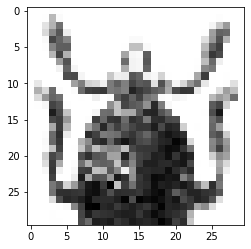

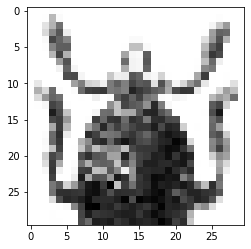

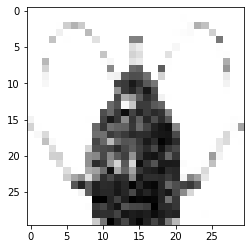

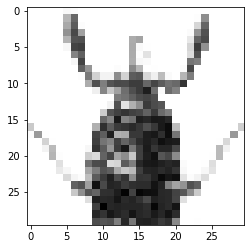

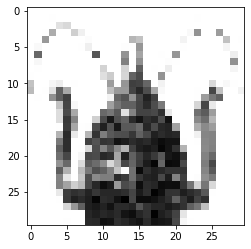

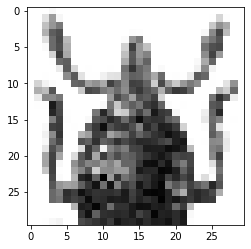

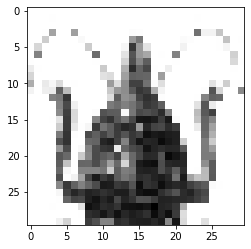

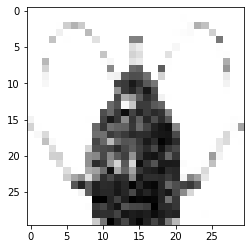

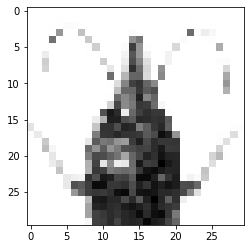

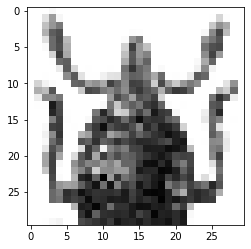

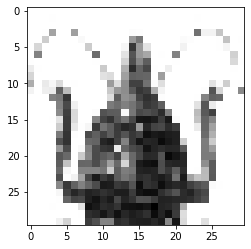

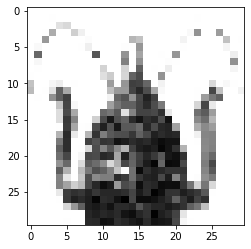

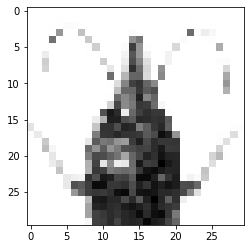

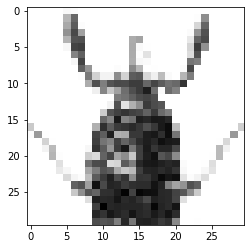

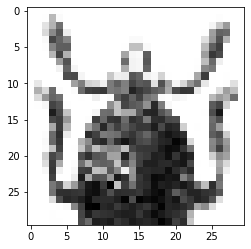

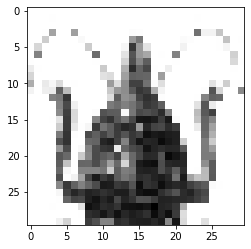

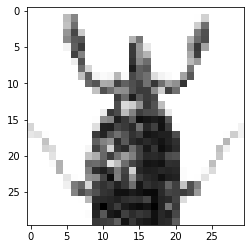

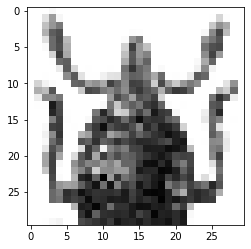

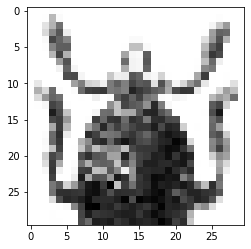

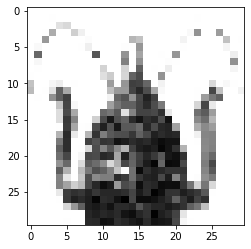

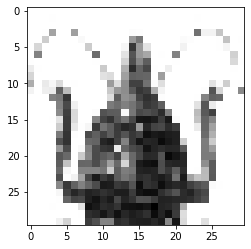

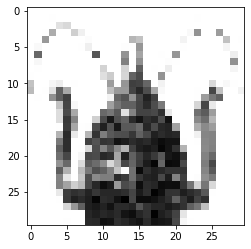

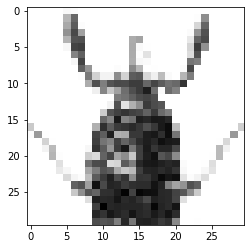

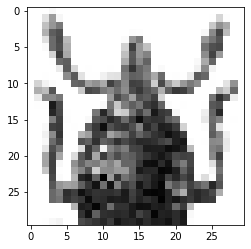

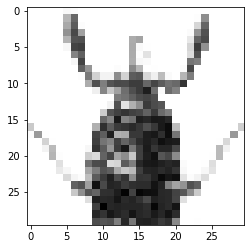

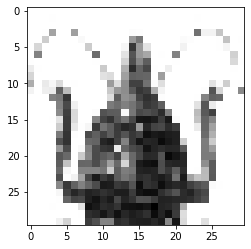

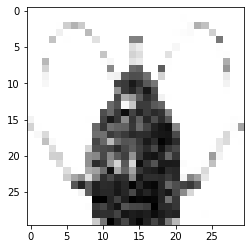

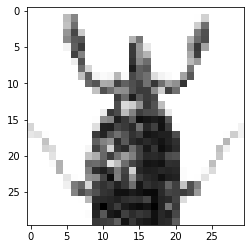

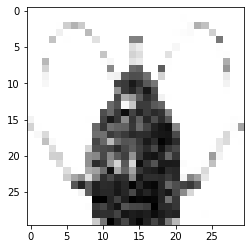

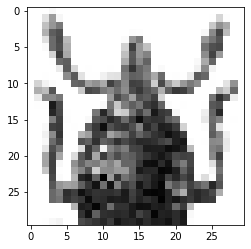

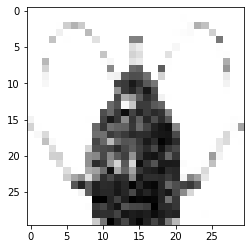

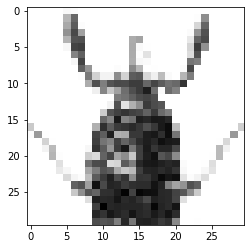

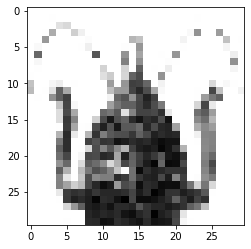

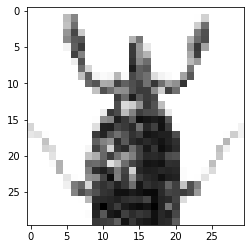

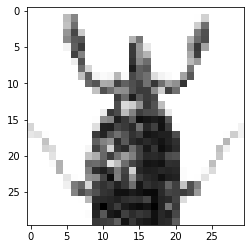

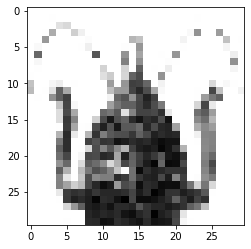

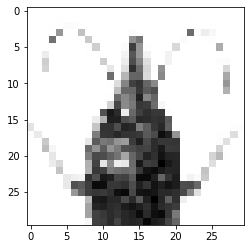

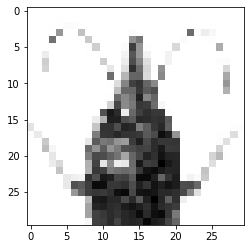

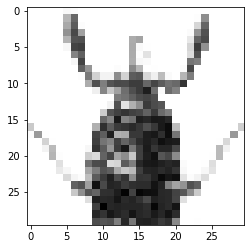

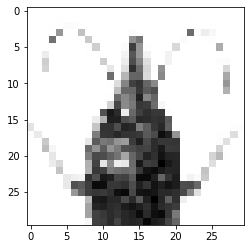

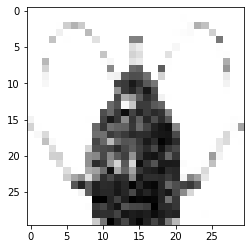

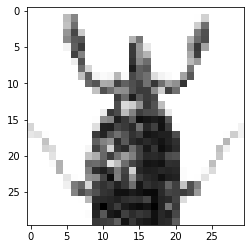

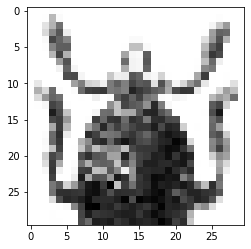

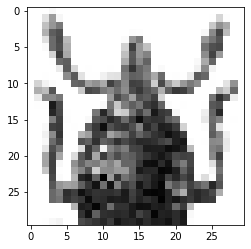

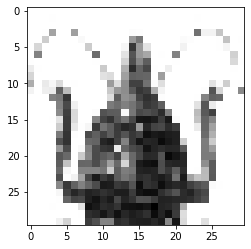

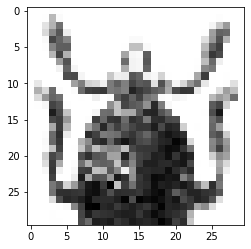

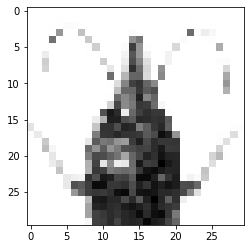

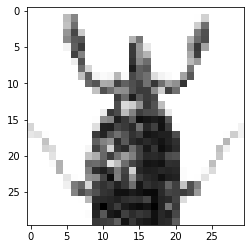

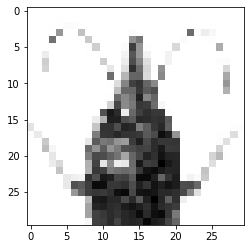

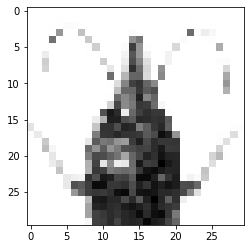

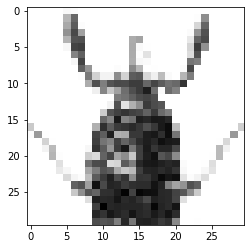

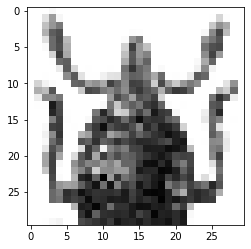

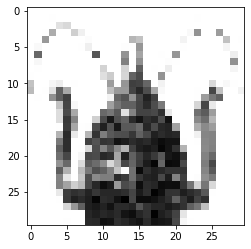

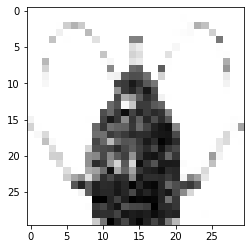

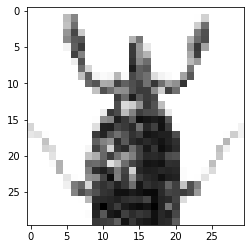

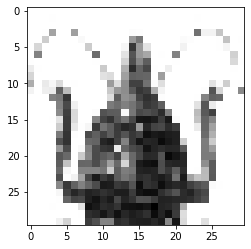

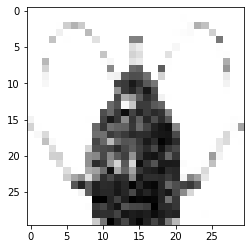

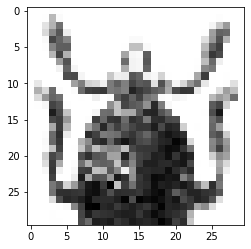

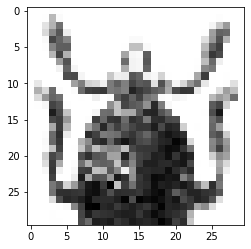

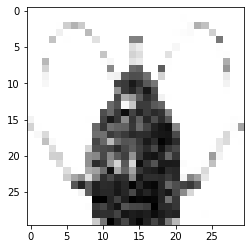

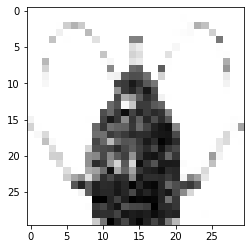

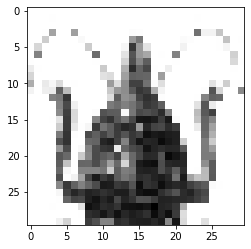

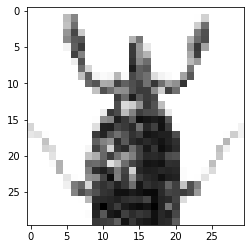

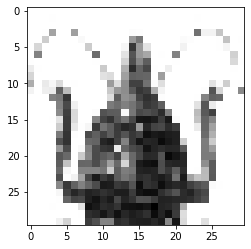

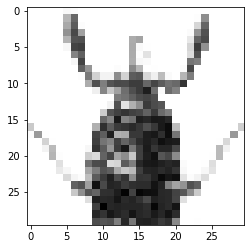

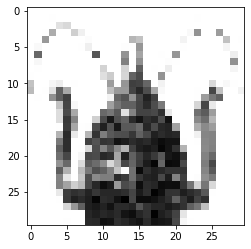

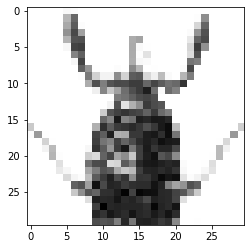

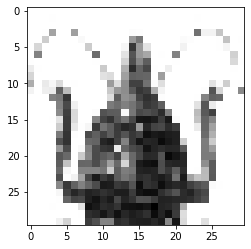

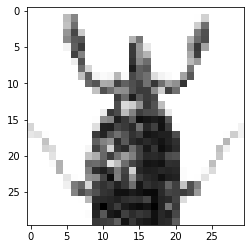

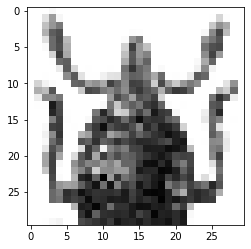

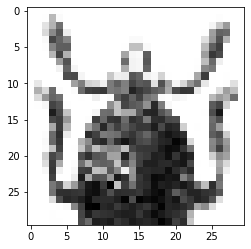

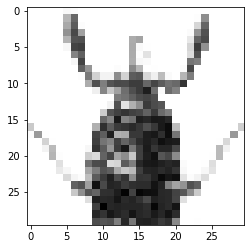

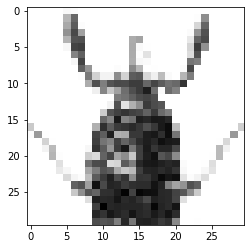

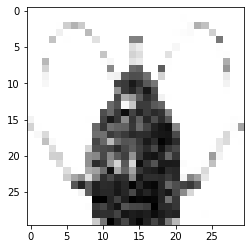

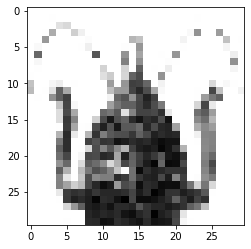

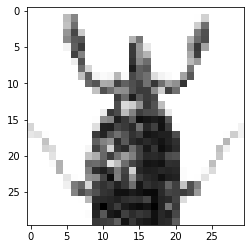

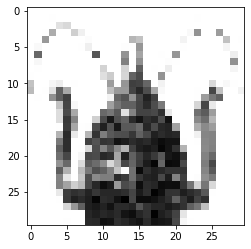

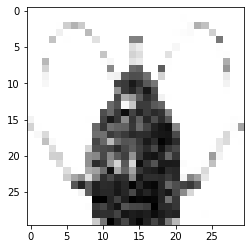

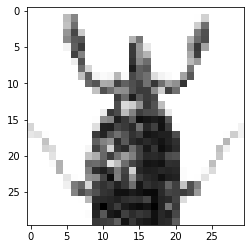

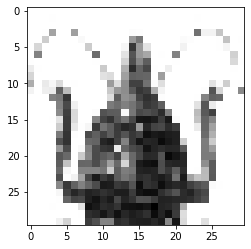

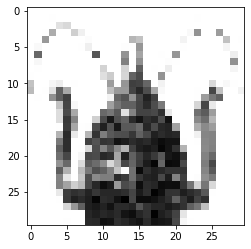

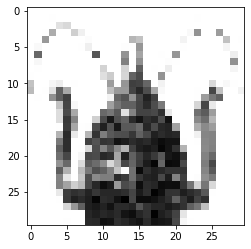

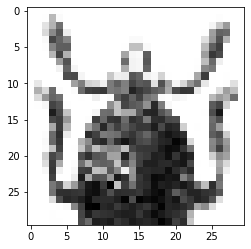

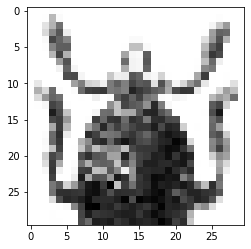

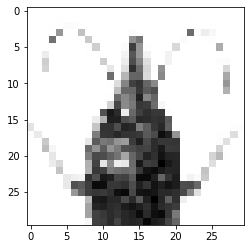

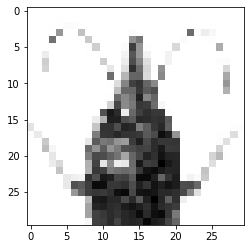

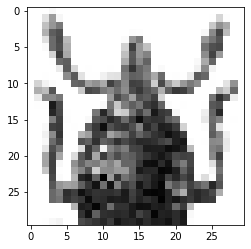

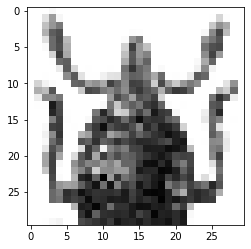

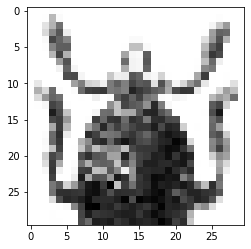

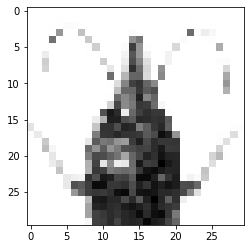

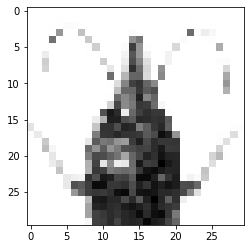

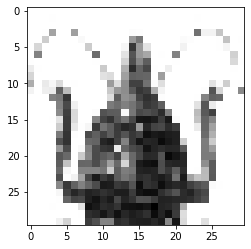

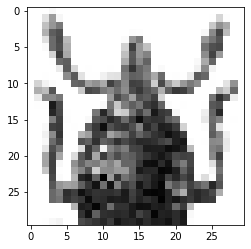

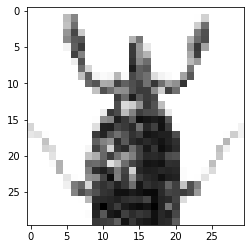

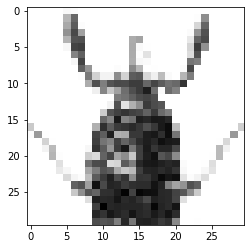

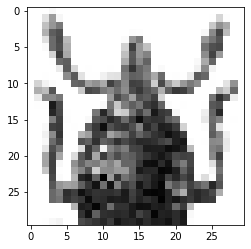

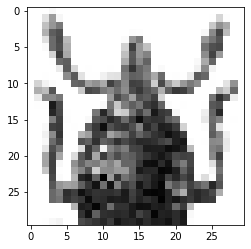

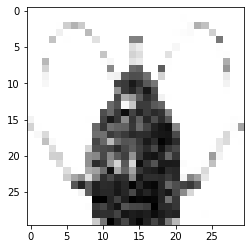

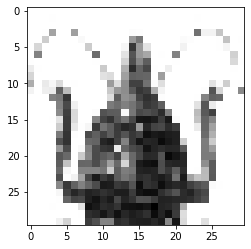

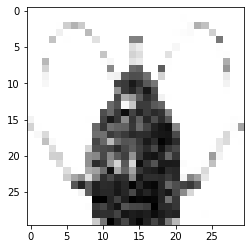

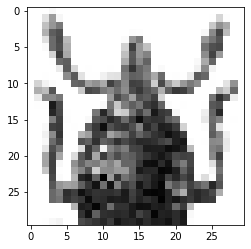

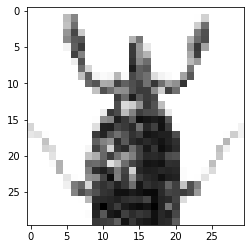

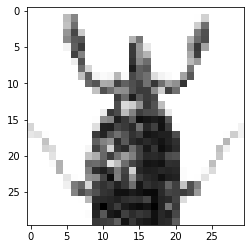

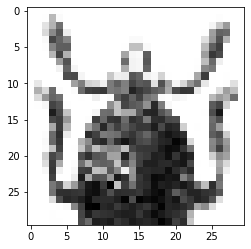

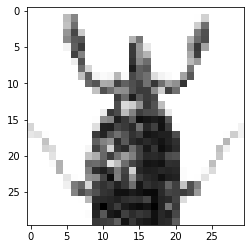

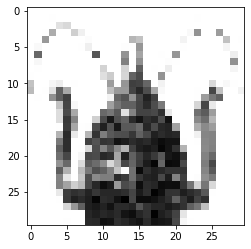

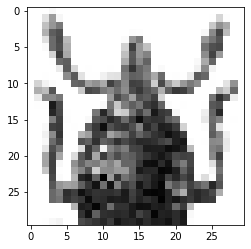

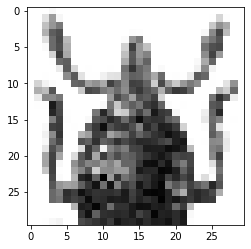

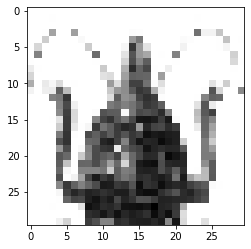

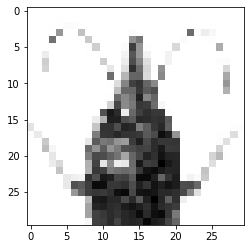

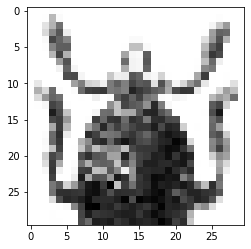

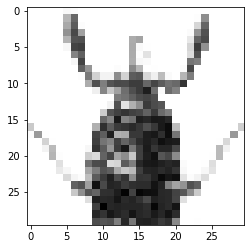

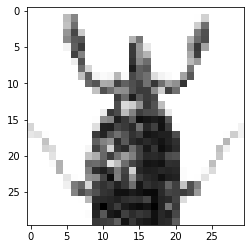

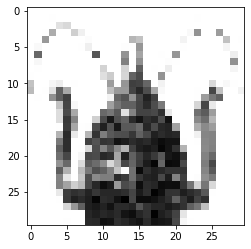

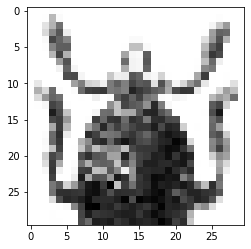

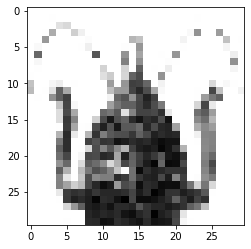

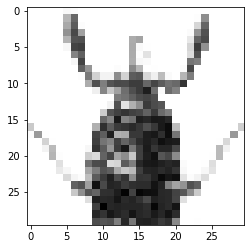

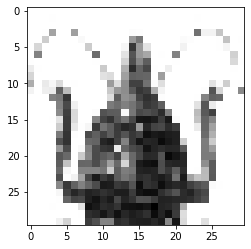

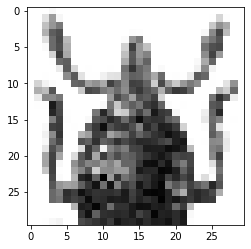

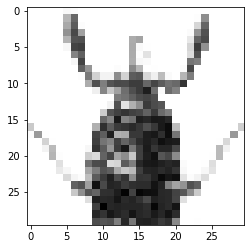

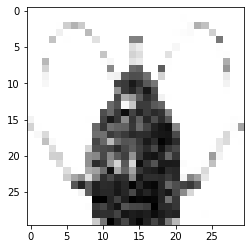

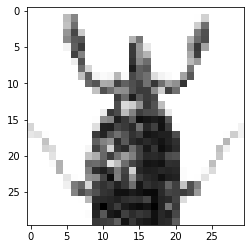

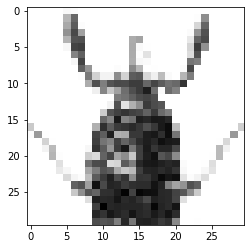

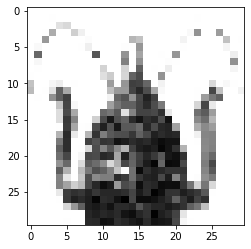

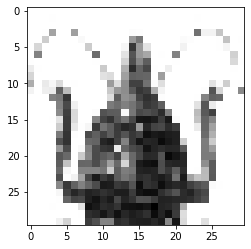

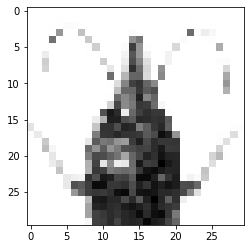

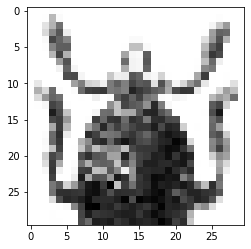

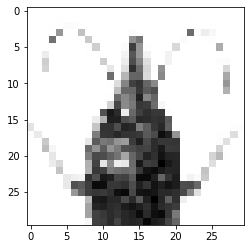

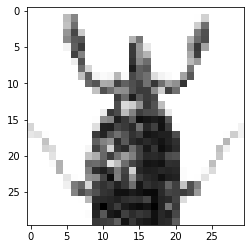

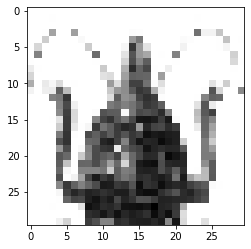

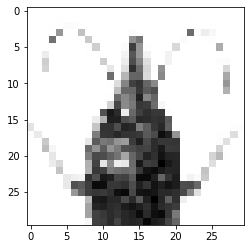

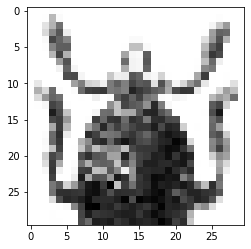

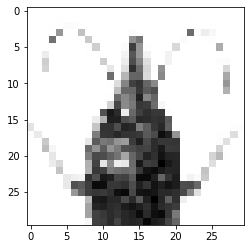

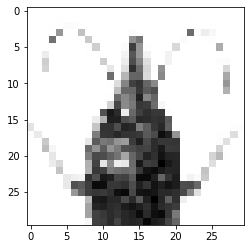

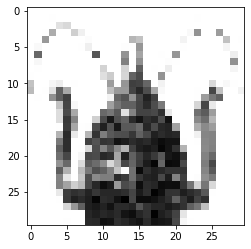

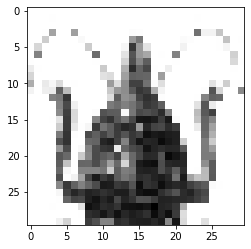

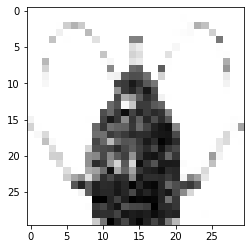

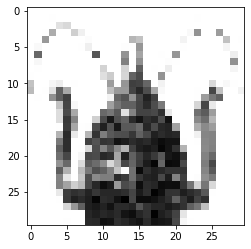

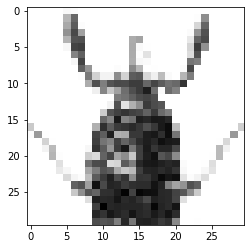

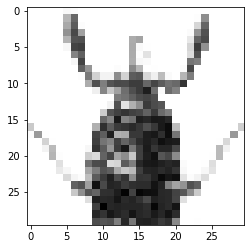

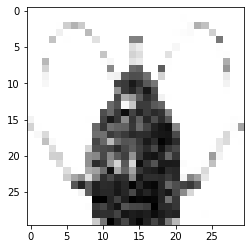

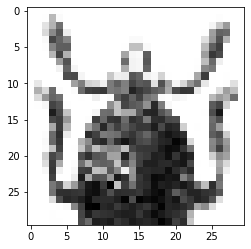

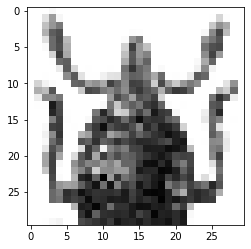

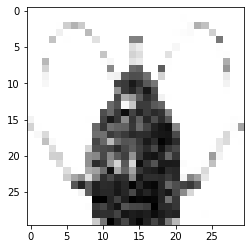

In [13]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


Stimulus_sizes = []
Stimulus_inputs = []
for s in Stimulus_Image_Train:
    #load image
    stimulus = cv2.imread(s)
    #resize image
    stimulus_resized = cv2.resize(stimulus, (30, 30))
    #convert to grayscale
    final_stimulus = cv2.cvtColor(stimulus_resized,cv2.COLOR_BGR2GRAY)
    #Reshape to one vector and scale values to [0,1]
    Stimulus_inputs.append(final_stimulus.reshape(-1)/255)
    #Plot the results
    plt.imshow(final_stimulus, cmap=plt.get_cmap('gray'))
    plt.show()
    Stimulus_sizes.append(final_stimulus.shape)

In [14]:
Stimulus_inputs = tf.convert_to_tensor(np.array(Stimulus_inputs))
print("\nResulting size of Stimulus inputs:")
print(np.shape(Stimulus_inputs)[1])


Resulting size of Stimulus inputs:
900


In [15]:
print(type(Stimulus_inputs))
print('Stimulus_inputs shape: ',Stimulus_inputs.shape)
print('Stimulus_inputs one member shape: ',Stimulus_inputs[1].shape)

print('-------------------------')
print(type(Stimulus_Image_Train))
print(Stimulus_Image_Train.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
Stimulus_inputs shape:  (144, 900)
Stimulus_inputs one member shape:  (900,)
-------------------------
<class 'numpy.ndarray'>
(144,)


In [16]:
#############################################################################################################
############################### Context Blocked Response Labeling Model 1 ##################################
###########################################################################################################
'''
in model 1 # In this version I will pass the context to the desne layer only once befroe multiplication
# check the figure and summary of the model.
'''

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

# Inputs
Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
Mask = keras.Input(shape=(6,), name='mask')

# transforming stimulus and context
Context_feature_1 = layers.Dense(100, activation="relu")(Context_Inputs)
#Context_feature_2 = layers.Dense(100, activation="relu")(Context_feature_1)
Stimulus_feature = layers.Dense(100, activation="relu")(Stimulus_Input)

# Mutiplication the output of previoues transformation
Multiplication = layers.Multiply()([Stimulus_feature, Context_feature_1])
Muli_dens = layers.Dense(100, activation="relu")(Multiplication)

#Output
outputs = layers.Dense(6, activation = 'softmax')(Muli_dens)
outputs_mask = layers.Multiply()([outputs,Mask])

# Model_1 is additive model
model_1 = Model(inputs=[Context_Inputs, Stimulus_Input, Mask], outputs=outputs_mask, name='Context_Blocked_Response_Labeling_Model_1_Multipilicative')


Model: "Context_Blocked_Response_Labeling_Model_1_Multipilicative"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Stimulus (InputLayer)           [(None, 900)]        0                                            
__________________________________________________________________________________________________
Context (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          90100       Stimulus[0][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          400         Context[0][0]                    
__________________________________________

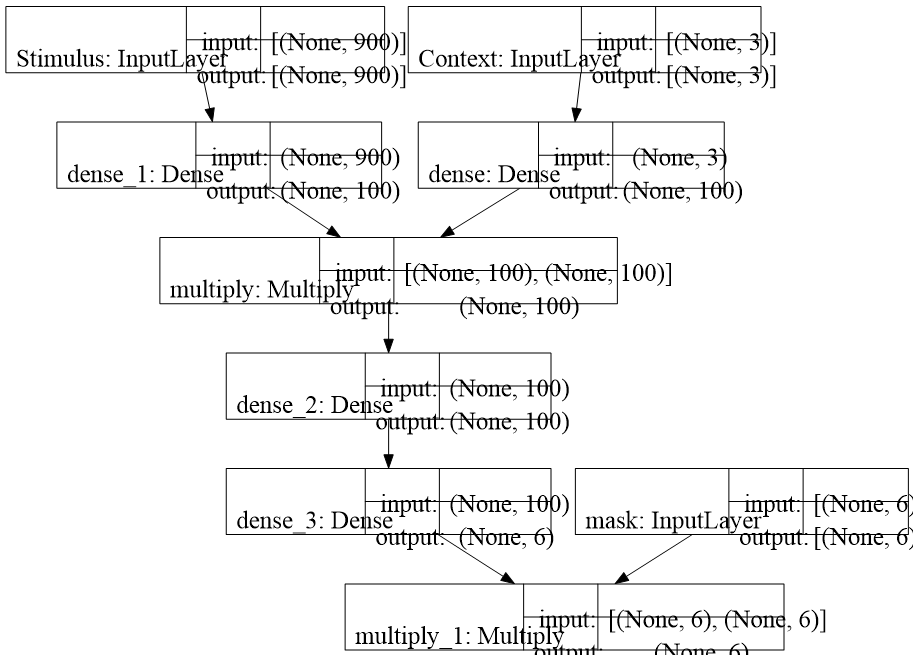

In [17]:
# summarize layers
print(model_1.summary())

# plot graph
keras.utils.plot_model(model_1, "Context_Blocked_Response_Labeling_Model_1_Multipilicative.png", show_shapes=True)

In [18]:
#############################################################################################################
############################### Context Blocked Response Labeling Model 2 ##################################
###########################################################################################################
'''
in model 2 # In this version I will pass the context to the desne layer Two TIMES befroe multiplication
# check the figure and summary of the model.
'''

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

# Inputs
Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
Mask = keras.Input(shape=(6,), name='mask')

# transforming stimulus and context
Context_feature_1 = layers.Dense(100, activation="relu")(Context_Inputs)
Context_feature_2 = layers.Dense(100, activation="relu")(Context_feature_1)
Stimulus_feature = layers.Dense(100, activation="relu")(Stimulus_Input)

# Mutiplication the output of previoues transformation
Multiplication = layers.Multiply()([Stimulus_feature, Context_feature_2])
#Muli_dens = layers.Dense(100, activation="relu")(Multiplication)

#Output
outputs = layers.Dense(6, activation = 'softmax')(Multiplication)
outputs_mask = layers.Multiply()([outputs, Mask])

# Model_1 is additive model
model_2 = Model(inputs = [Context_Inputs, Stimulus_Input, Mask], outputs = outputs_mask, name = 'Context_Blocked_Response_Labeling_Model_2_Multipilicative')


Model: "Context_Blocked_Response_Labeling_Model_2_Multipilicative"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Context (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
Stimulus (InputLayer)           [(None, 900)]        0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 100)          400         Context[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 100)          90100       Stimulus[0][0]                   
__________________________________________

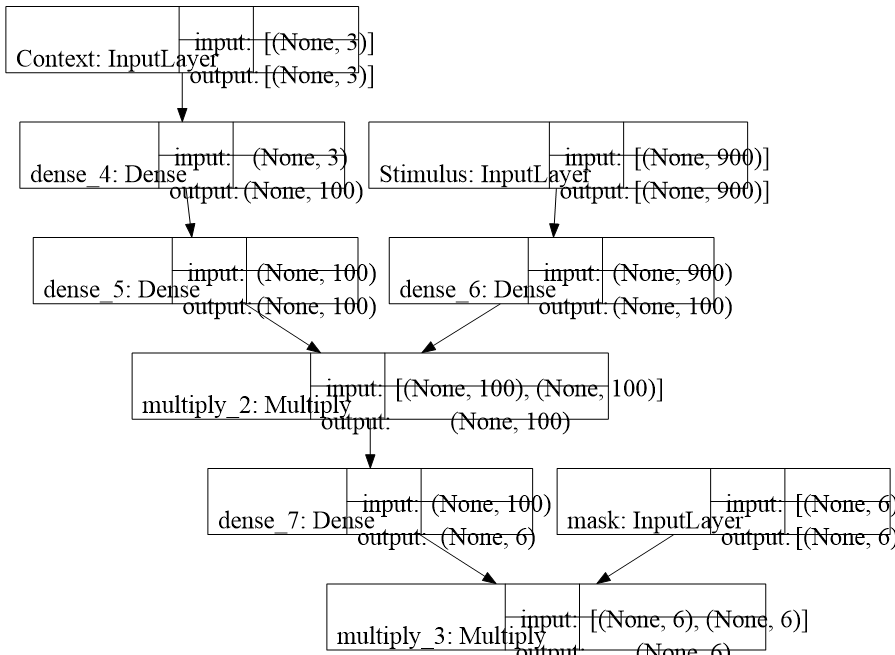

In [19]:
# summarize layers
print(model_2.summary())

# plot graph
keras.utils.plot_model(model_2, "Context_Blocked_Response_Labeling_Model_2_Multipilicative.png", show_shapes=True)

# Model 1
# Context Blocked Response labeling

In [20]:
###########################################################################################################
############################################# Defualt Initilizer Model 1 #############################################
###########################################################################################################

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

def Model_Context_Blocked_Labeling(epoch):
    '''
    the defualt initilizer is rich and good enough
    '''
    ##from numpy.random import seed
    #import tensorflow
    #seed(s)
    #tensorflow.random.set_seed(s)
    
    
    # Inputs
    import numpy as np
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.utils.vis_utils import plot_model
    from keras.models import Model
    from keras.layers import Input
    from keras.layers import Dense

    tf.keras.backend.clear_session()
    # Inputs
    Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
    Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
    Mask = keras.Input(shape=(6,), name='mask')

    # transforming stimulus and context
    Context_feature_1 = layers.Dense(100, activation="relu")(Context_Inputs)
    #Context_feature_2 = layers.Dense(100, activation="relu")(Context_feature_1)
    Stimulus_feature = layers.Dense(100, activation="relu")(Stimulus_Input)

    # Mutiplication the output of previoues transformation
    Multiplication = layers.Multiply()([Stimulus_feature, Context_feature_1])
    Muli_dens = layers.Dense(100, activation="relu")(Multiplication)

    #Output
    outputs = layers.Dense(6, activation = 'softmax')(Muli_dens)
    outputs_mask = layers.Multiply()([outputs,Mask])

    # Model_1 is additive model
    model_1 = Model(inputs=[Context_Inputs, Stimulus_Input, Mask], outputs=outputs_mask, name='Context_Blocked_Response_Labeling_Model_1_Multipilicative')



    # maybe I need to change the learning rate in ADAM optimizer
    optimizer = keras.optimizers.Adam(lr=0.0001)
    model_1.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    
     # Evaluate the model before training with data similar to train data to see the difference before training and after training
    print('acc before train ------------------------------------')
    loss_before, acc_before = model_1.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train) # , batch_size=48

    
    # Train the model
    EPOCHS = epoch 
    history = model_1.fit(x=[Context_Input_Train, Stimulus_inputs, Mask_df], 
                        y=Labels_Train, 
                        epochs = EPOCHS, 
                        shuffle=False, 
                        batch_size=1)
    
    
    
    # Evaluate the model after training:
    print('acc after train-------------------------------------')
    loss_after, acc_after = model_1.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)

    return acc_before, loss_before, acc_after, loss_after, model_1, history

epoch=15
dict_models_1 = {}
dict_models_1['ACC_Before'] = []
dict_models_1['ACC_After'] = []
dict_models_1['Loss_Before'] = []
dict_models_1['Loss_After'] = []
dict_models_1['model'] = []

# How many epoch do I have at the end define the number of collumns in this dataframe
# Number of Epochs=? average epoch
df_accuracy_1 = pd.DataFrame(columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
                                      'E11', 'E12', 'E13', 'E14', 'E15'])

df_loss_1 = pd.DataFrame(columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
                                  'E11', 'E12', 'E13', 'E14', 'E15'])

for i in range(1000):
    print('Subject ', i)
    accuracy_before, loss_before, accuracy_after, loss_after, model, history = Model_Context_Blocked_Labeling(epoch)
    dict_models_1['ACC_Before'].append(accuracy_before)
    dict_models_1['ACC_After'].append(accuracy_after)
    dict_models_1['Loss_Before'].append(loss_before)
    dict_models_1['Loss_After'].append(loss_after)
    dict_models_1['model'].append(model)
    df_accuracy_1.loc[len(df_accuracy_1)] = history.history['accuracy']
    df_loss_1.loc[len(df_loss_1)] = history.history['loss']

Subject  0
acc before train ------------------------------------


C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5178 - accuracy: 0.87 - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.7083
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.93 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6975 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5804 - accuracy: 0.92 - 0s 3ms/step - loss: 0.5891 - accuracy: 0.8958
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7569: 0s - loss: 0.6150 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4825 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.6806
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7431
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.7708
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8264: 0s - loss: 0.5071 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5038 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.64 - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6338 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5706 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6980 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


acc before train ------------------------------------
5/5 [==============================] - 0s 8ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6261 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.50 - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6458
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6944: 0s - loss: 0.6333 - accura
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4454 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7007 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.8264: 0s - loss: 0.4829 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5287 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.9236
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.8542: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.7083
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6899 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4653: 0s - loss: 0.6962 - accuracy: 0.46
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.498

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.7083: 0s - loss: 0.6727 - accuracy: 0.72
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.528

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6871 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.63 - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.7000 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.82 - 0s 1ms/step - loss: 0.6639 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.7500TA: 0s - loss: 0.6309 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.8403
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.8750: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.70 - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6878 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.6460 ETA: 0s - loss: 0.6659 - accuracy:  - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.8958
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6878 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.90 - 0s 1ms/step - loss: 0.6262 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.8056: 0s - loss: 0.4764 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.8264
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6848 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.8750: 0s - loss: 0.3075 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4393 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5759 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.7431: 0s - loss: 0.6540 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.8403: 0s - loss: 0.5414 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6965 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.8056: 0s - loss: 0.4786 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5028 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5556: 0s - loss: 0.6783 - accuracy: 0.57
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.8889: 0s - loss: 0.5154 - accuracy: 0.93
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.8056: 0s - loss: 0.5950 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5492 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5221 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6943 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.96 - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5278TA: 0s - loss: 0.6749 - accuracy: 0.58
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6181: 0s - loss: 0.6780 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4965 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6899 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.6181 ETA: 0s - loss: 0.6724 - accuracy: 0.73
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.77 - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.8194: 0s - loss: 0.5297 - accuracy: 0.

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.52 - 1s 1ms/step - loss: 0.6963 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.8819
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.8958
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.6042
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6720 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5764 ETA: 0s - loss: 0.6676 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.8403: 0s - loss: 0.5718 - accuracy: 0.84
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.8611
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4557 - accuracy: 0.90 - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6177 - accuracy: 0.78 - 0s 1ms/step - loss: 0.6337 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6869 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5827 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6903 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6137 - accuracy: 0.7857 ETA: 0s - loss: 0.5908 - accuracy: 0. - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7361: 0s - loss: 0.5273 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.8194
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6881 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5764: 0s - loss: 0.6862 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8542: 0s - loss: 0.5038 - accuracy: 0.91
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.7222: 0s - loss: 0.6353 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.7431: 0s - loss: 0.5987 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.7222: 0s - loss: 0.6571 - accuracy: 0.77
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6054 - accuracy: 0.8624 ETA: 0s - loss: 0.6056 - accuracy: 0. - 0s 1ms/step - loss: 0.6254 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.89

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6870 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6111 ETA: 0s - loss: 0.6694 - accuracy: 0.65
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.393

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6903 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6875TA: 0s - loss: 0.6365 - accuracy: 0.74
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4694 - accuracy: 0.95 - 0s 1ms/step - loss: 0.5208 - accuracy: 0.8750
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5524 - accuracy: 0.90 - 0s 2ms/step - loss: 0.5728 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.7013 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.596 - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.74 - 0s 1ms/step - loss: 0.6633 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7986
Epoch 9/15
144/144 [==========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.51 - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6111: 0s - loss: 0.6769 - accuracy: 0.51 - ETA: 0s - loss: 0.6802 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.82 - 0s 1ms/step - loss: 0.6253 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.6528 ETA: 0s - loss: 0.6665 - accuracy: 0.7500   - ETA: 0s - loss: 0.6720 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.8403
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6943 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6111: 0s - loss: 0.6753 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5098 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.8889: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.6000 - ETA: 0s - loss: 0.6820 - accuracy: 0.55 - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.7778: 0s - loss: 0.6065 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.8264: 0s - loss: 0.5621 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.52 - 1s 1ms/step - loss: 0.6965 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5764: 0s - loss: 0.6781 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5848 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.8542
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6810 - accuracy: 0.69 - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.9236
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6389TA: 0s - loss: 0.6725 - accuracy: 0.70
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5833: 0s - loss: 0.6797 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.8056: 0s - loss: 0.4972 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6319 ETA: 0s - loss: 0.6794 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.464

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.63 - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.77 - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.8542: 0s - loss: 0.4070 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.8681

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6995 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.4931: 0s - loss: 0.6889 - accuracy: 0.50
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6597: 0s - loss: 0.6069 - accuracy: 0.84 - ETA: 0s - loss: 0.6302 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.8056
Epo

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6667 ETA: 0s - loss: 0.6592 - accuracy: 0.74
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7847 ETA: 0s - loss: 0.6164 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6038 - accuracy: 0.91 - 0s 1ms/step - loss: 0.6216 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8681: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6736: 0s - loss: 0.6723 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7847: 0s - loss: 0.4719 - accuracy: 0.
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6736: 0s - loss: 0.6655 - accuracy: 0. - ETA: 0s - loss: 0.6708 - accuracy: 0.71
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.8472
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.47 - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.6806: 0s - loss: 0.6644 - accuracy: 0.67 - ETA: 0s - loss: 0.6681 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6218 - accuracy: 0.83 - 0s 2ms/step - loss: 0.6310 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6977 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5625: 0s - loss: 0.6852 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6458 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.8056: 0s - loss: 0.5528 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.8125
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6972 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.88 - 0s 1ms/step - loss: 0.6366 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.8750: 0s - loss: 0.4474 - accuracy: 
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6942 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6181: 0s - loss: 0.6792 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5300 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.7361: 0s - loss: 0.6111 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6123 - accuracy: 0.7569: 0s - loss: 0.5935 - accuracy: 0.80
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.8472
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.50 - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.8403
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.81 - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6865 - accuracy: 0.6597
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6806: 0s - loss: 0.6481 - accuracy: 0.70
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.8194: 0s - loss: 0.4699 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.8472
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6867 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7917: 0s - loss: 0.6216 - accuracy: 0.79
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.511

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5694 ETA: 0s - loss: 0.6708 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.86 - 0s 1ms/step - loss: 0.5224 - accuracy: 0.8194
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.5903: 0s - loss: 0.6768 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4516 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7361 ETA: 0s - loss: 0.5963 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6787 - accuracy: 0.67 - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6736 ETA: 0s - loss: 0.6681 - accuracy: 0.6667   - ETA: 0s - loss: 0.6680 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5431 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.8333: 0s - loss: 0.5142 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5098 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.4870e+ - ETA: 0s - loss: 0.6736 - accuracy: 0.50 - 0s 1ms/step - loss: 0.6843 - accuracy: 0.4792
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.8472
Epoch 9/15
144/144 [=======

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.7778 ETA: 0s - loss: 0.5998 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6250 ETA: 0s - loss: 0.6724 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.7361 ETA: 0s - loss: 0.6170 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.8333: 0s - loss: 0.4931 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8889
Epoch 9/1

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6859 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.81 - 0s 1ms/step - loss: 0.6183 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6859 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6250 ETA: 0s - loss: 0.6710 - accuracy: 0.7368   - ETA: 0s - loss: 0.6663 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7639 ETA: 0s - loss: 0.6135 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7986: 0s - loss: 0.4763 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1m

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.8403: 0s - loss: 0.4642 - accuracy: 
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4664 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.7639
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.8264
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.8194: 0s - loss: 0.5570 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.8958: 0s - loss: 0.4906 - accuracy: 0.90
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.69 - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7778 ETA: 0s - loss: 0.6029 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.8611: 0s - loss: 0.4975 - accuracy: 0.88
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7431: 0s - loss: 0.6423 - accuracy: 0.77
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.8333: 0s - loss: 0.4930 - accuracy: 0.88
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.9097
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.9167
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4793 - accuracy: 0.93 - 0s 1ms/step - loss: 0.5196 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6294 - accuracy: 0.8034 ETA: 0s - loss: 0.6091 - accuracy: 0. - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.8194: 0s - loss: 0.5160 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.8472: 0s - loss: 0.5422 - accuracy: 0.89
Epoch 8/15
144/144 [==============================] - 0s 1ms/step

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.7292: 0s - loss: 0.6153 - accuracy: 0.83 - ETA: 0s - loss: 0.6272 - accuracy: 0.78
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7986: 0s - loss: 0.4787 - accuracy: 0.83
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5972TA: 0s - loss: 0.6725 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.518

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6980 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.58 - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.7778: 0s - loss: 0.6151 - accuracy: 0.84 - ETA: 0s - loss: 0.6264 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.85

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6319 ETA: 0s - loss: 0.6653 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7431: 0s - loss: 0.5967 - accuracy: 0.82
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.8333: 0s - loss: 0.4615 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.521 - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6419 - accuracy: 0.76 - 0s 1ms/step - loss: 0.6508 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.8472: 0s - loss: 0.5417 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.9

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6788 - accuracy: 0.53 - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.6250: 0s - loss: 0.6698 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7153 ETA: 0s - loss: 0.6428 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.8403
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6881 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.8264: 0s - loss: 0.5233 - accuracy: 0.94
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4764 - accuracy: 0.93 - 0s 1ms/step - loss: 0.5184 - accuracy: 0.8333
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.7292TA: 0s - loss: 0.6619 - accuracy: 0.75
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.8889: 0s - loss: 0.4141 - accuracy
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.53 - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.8472
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.5254   - ETA: 0s - loss: 0.6789 - accuracy: 0. - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.8056
Epoch 9/15
144/144 [=========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6840 - accuracy: 0.6667
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.7014 ETA: 0s - loss: 0.6617 - accuracy: 0.77
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.9236
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6250: 0s - loss: 0.6833 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5844 - accuracy: 0.80 - 0s 1ms/step - loss: 0.6041 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.8056
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6528 ETA: 0s - loss: 0.6704 - accuracy: 0.76
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.8403 ETA: 0s - loss: 0.5724 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.8611
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000 ETA: 0s - loss: 0.6901 - accuracy: 0.51
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5694: 0s - loss: 0.6757 - accuracy: 0.69 - ETA: 0s - loss: 0.6775 - accuracy: 0.65 - ETA: 0s - loss: 0.6790 - accuracy: 0.59
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7708: 0s - loss: 0.5738 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5205 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.90 - 0s 1ms/step - loss: 0.6290 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5648 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.50 - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6667TA: 0s - loss: 0.6657 - accuracy: 0.71
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6432 - accuracy: 0.8070e+ - ETA: 0s - loss: 0.6269 - accuracy: 0.89 - 0s 1ms/step - loss: 0.6541 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7986
Epoch 8/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5290 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8542: 0s - loss: 0.3065 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4396 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5972: 0s - loss: 0.6696 - accuracy: 0.64
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5045 - accuracy: 0.91 - 0s 1ms/step - loss: 0.5420 - accuracy: 0.8611
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.7083: 0s - loss: 0.6415 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6243 - accuracy: 0.85 - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.87 - 0s 1ms/step - loss: 0.5545 - accuracy: 0.8056

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.537 - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.8958: 0s - loss: 0.3686 - accuracy: 
Epoch 9/15
144/144 [====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4578 - accuracy: 0.91 - 0s 1ms/step - loss: 0.5095 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5972: 0s - loss: 0.6851 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7083TA: 0s - loss: 0.6432 - accuracy: 0.75
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8403
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5208
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5467 - accuracy: 0.87 - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6412 - accuracy: 0.73 - 0s 1ms/step - loss: 0.6508 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6099 - accuracy: 0.79 - 0s 1ms/step - loss: 0.6276 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.8403
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.53 - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5972: 0s - loss: 0.6701 - accuracy: 0.65 - ETA: 0s - loss: 0.6770 - accuracy: 0.62
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5833 ETA: 0s - loss: 0.6773 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8750: 0s - loss: 0.3918 - accuracy
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.88 - 0s 1ms/step - loss: 0.5255 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.52 - 1s 1ms/step - loss: 0.7004 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.7431 ETA: 0s - loss: 0.5995 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.8681: 0s - loss: 0.5100 - accuracy: 0.
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6042TA: 0s - loss: 0.6623 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.533

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.8681: 0s - loss: 0.4918 - accuracy: 0.92 - ETA: 0s - loss: 0.5350 - accuracy: 0.91
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.8611: 0s - loss: 0.4776 - accuracy: 0. - ETA: 0s - loss: 0.5201 - accuracy: 0.87
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6944TA: 0s - loss: 0.6416 - accuracy: 0.72
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7778 ETA: 0s - loss: 0.5377 - accuracy: 0.89
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8403
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 1ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4823 - accuracy: 0.91 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.8472: 0s - loss: 0.5350 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4800 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5694TA: 0s - loss: 0.6802 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7847: 0s - loss: 0.5152 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7917: 0s - loss: 0.3747 - accuracy: 
Epoch 9/15
144/14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6961 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5556 ETA: 0s - loss: 0.6612 - accuracy: 0.67
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5429 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.6250: 0s - loss: 0.5913 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5143 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6408 - accuracy: 0.69 - 0s 1ms/step - loss: 0.6501 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.9236
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6895 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.8472
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8750
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.9028: 0s - loss: 0.5514 - accuracy: 0.91
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.9167
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.486

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.70 - 0s 1ms/step - loss: 0.6761 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.517 - 1s 1ms/step - loss: 0.6904 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6647 - accuracy: 0.6250   - ETA: 0s - loss: 0.6702 - accuracy: 0.63 - ETA: 0s - loss: 0.6750 - accuracy: 0.64 - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6605 - accuracy: 0.66 - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7917


C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6875 ETA: 0s - loss: 0.6543 - accuracy: 0.68
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.8611: 0s - loss: 0.2739 - accura
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4632 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.51 - 1s 1ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6432 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6614 - accuracy: 0.66 - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6898 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.7153
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.87 - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.6875TA: 0s - loss: 0.6303 - accuracy: 0.75
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6973 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7847: 0s - loss: 0.4946 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5098 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7431: 0s - loss: 0.5754 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5133 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.7003 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7847: 0s - loss: 0.5793 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4568 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4722: 0s - loss: 0.6965 - accuracy: 0.48
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.522

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7083: 0s - loss: 0.6293 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4685 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6892 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6667TA: 0s - loss: 0.6679 - accuracy: 0.73
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.6018 ETA: 0s - loss: 0.6825 - accuracy: 0. - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.8889
Epoch 9/15
144/144 [=============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7431 ETA: 0s - loss: 0.6292 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5934 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.8472: 0s - loss: 0.4646 - accuracy: 0.93
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.571 - 1s 1ms/step - loss: 0.6939 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6989 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5000: 0s - loss: 0.6862 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5203 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5459 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6389: 0s - loss: 0.6678 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4716 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6942 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6961 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5556 ETA: 0s - loss: 0.6809 - accuracy: 0.5833 - ETA: 0s - loss: 0.6849 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7917
Epoch 9/15
144/144 [=============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.49 - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.78 - 0s 1ms/step - loss: 0.6246 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.8364 ETA: 0s - loss: 0.4084 - accuracy: 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5903 ETA: 0s - loss: 0.6651 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6965 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.7153: 0s - loss: 0.6439 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7778: 0s - loss: 0.4978 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5400 - accuracy: 0.8194: 0s - loss: 0.4086 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.8403: 0s - loss: 0.4460 - accuracy: 0.89
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.8264: 0s - loss: 0.4665 - accuracy: 0.92
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.479

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.48 - 1s 1ms/step - loss: 0.6968 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5625: 0s - loss: 0.6798 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7153: 0s - loss: 0.6135 - accuracy
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6089 - accuracy: 0.84 - ETA: 0s - loss: 0.6218 - accuracy: 0.81 - 0s 1ms/step - loss: 0.6361 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7917
Epoch 8/15
144/144 [=====

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.543 - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.8333: 0s - loss: 0.5319 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.8264
Epoch 9/15
144/144 [==================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6731 - accuracy: 0.60 - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.6736TA: 0s - loss: 0.6368 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8889
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6895 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.63 - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7639: 0s - loss: 0.5812 - accuracy
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.87 - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.8403
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6344 - accuracy: 0.76 - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5026 - accuracy: 0.8958: 0s - loss: 0.3456 - accuracy: 
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5278 ETA: 0s - loss: 0.6809 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.8333: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6958 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.54 - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.5764 ETA: 0s - loss: 0.6609 - accuracy: 0.74
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5386 - accuracy: 0.8056
Epoch 9/15
144/144 [=============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.6042 ETA: 0s - loss: 0.6795 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.7153: 0s - loss: 0.6584 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5543 - accuracy: 0.92 - 0s 1ms/step - loss: 0.5832 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.8542
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.56 - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.541 - 1s 1ms/step - loss: 0.6892 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.7431: 0s - loss: 0.6116 - accuracy: 0.94 - ETA: 0s - loss: 0.6359 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.9

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6736 ETA: 0s - loss: 0.6525 - accuracy: 0.76
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8889: 0s - loss: 0.3612 - accuracy
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.8194: 0s - loss: 0.5885 - accuracy: 0.84
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.499

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6760 - accuracy: 0.63 - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6981 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5526   - ETA: 0s - loss: 0.6851 - accuracy: 0.53 - ETA: 0s - loss: 0.6835 - accuracy: 0.61 - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.6181 ETA: 0s - loss: 0.6628 - accuracy: 0.71
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5829 - accuracy: 0.7986
Epoch 8/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.52 - 1s 1ms/step - loss: 0.6943 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6111 ETA: 0s - loss: 0.6506 - accuracy: 0.71
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6944TA: 0s - loss: 0.6394 - accuracy: 0.74
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.8194: 0s - loss: 0.5109 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - ETA: 0s -

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6250: 0s - loss: 0.6375 - accuracy: 0.76 - ETA: 0s - loss: 0.6500 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.68 - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.77

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.549 - 1s 1ms/step - loss: 0.6870 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.93 - ETA: 0s - loss: 0.5307 - accuracy: 0.86 - 0s 1ms/step - loss: 0.5620 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5249 - accur

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6871 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6806: 0s - loss: 0.6783 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7361: 0s - loss: 0.6582 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6045 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.7917
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.521 - 1s 1ms/step - loss: 0.6955 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.8194: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.550 - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5903TA: 0s - loss: 0.6783 - accuracy: 0.63
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5517 - accuracy: 0.88 - 0s 1ms/step - loss: 0.5793 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.8264: 0s - loss: 0.4962 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4423 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6972 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7014 ETA: 0s - loss: 0.6307 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4028
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5347
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.9375
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6963 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.5972
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6103 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7778: 0s - loss: 0.5018 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5027 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.9097
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.9236
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5347 ETA: 0s - loss: 0.6765 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.8472
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5903: 0s - loss: 0.6779 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4882 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.508 - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5556: 0s - loss: 0.6794 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8403
Epoch 9/15
144/144 [==================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6517 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6032 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7917: 0s - loss: 0.4279 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4891 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6564 - accuracy: 0.60 - 0s 1ms/step - loss: 0.6647 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.6042
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8542: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.51 - 1s 1ms/step - loss: 0.6880 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7847: 0s - loss: 0.5337 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8264
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5764: 0s - loss: 0.6789 - accuracy: 0.57
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.492

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6980 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.6042: 0s - loss: 0.6720 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5130 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.54 - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6710 - accuracy: 0.68 - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.8056
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5546 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6892 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6319 ETA: 0s - loss: 0.6695 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.478

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.8056: 0s - loss: 0.5828 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4949 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5486TA: 0s - loss: 0.6838 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.7708: 0s - loss: 0.5640 - accuracy: 0.83
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7986
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.7708: 0s - loss: 0.5996 - accuracy: 0.80
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.533

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5922 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.6458 ETA: 0s - loss: 0.6788 - accuracy: 0.64 - ETA: 0s - loss: 0.6791 - accuracy: 0.71
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.8542
Epoch 9/15
144/144 [=============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6894 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7222: 0s - loss: 0.6476 - accuracy: 0.71
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.517

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6056 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7986
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.8264
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8611: 0s - loss: 0.2

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.8125
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8958: 0s - loss: 0.4676 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.9097
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4426 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.8333: 0s - loss: 0.4612 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4768 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6895 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5625: 0s - loss: 0.6842 - accuracy: 0.57
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.474

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.7361: 0s - loss: 0.6363 - accuracy: 0.78
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.469

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6879 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6736: 0s - loss: 0.6561 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4684 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.63 - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5379 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.573 - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6261 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6944: 0s - loss: 0.6626 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5137 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.6181 ETA: 0s - loss: 0.6822 - accuracy: 0.55
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4167
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5347
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.7014 ETA: 0s - loss: 0.6483 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.7000e+ - ETA: 0s - loss: 0.6541 - accuracy: 0.68 - 0s 1ms/step - loss: 0.6696 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.8889
Epoch 9/15
144/144 [=======

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5972: 0s - loss: 0.6829 - accuracy: 0.61
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.478

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6980 - accuracy: 0.5069: 0s - loss: 0.6981 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.491

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5764: 0s - loss: 0.6821 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7569TA: 0s - loss: 0.6516 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.8333
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6888 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6667 ETA: 0s - loss: 0.6528 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6492 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.485

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5208A: 0s - loss: 0.6941 - accuracy: 0.53
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.49

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5764 ETA: 0s - loss: 0.6833 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.7153: 0s - loss: 0.6555 - accuracy: 0.72
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8472
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.9097
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6736 ETA: 0s - loss: 0.6670 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.8750
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5310 - accuracy: 0.93 - 0s 2ms/step - loss: 0.5453 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5972: 0s - loss: 0.6734 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4913 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6987 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6885 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5764TA: 0s - loss: 0.6712 - accuracy: 0.61
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6988 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7986 ETA: 0s - loss: 0.6081 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.8542: 0s - loss: 0.5534 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.8819
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6892 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7639
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.8056: 0s - loss: 0.6141 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7014: 0s - loss: 0.6589 - accuracy: 0.70
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.508

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6042: 0s - loss: 0.6813 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5150 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 4s 2ms/step - loss: 0.6935 - accuracy: 0.5069TA: 0s - loss: 0.6923 - accuracy: 0.51
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.85 - 0s 1ms/step - loss: 0.5670 - accuracy: 0.7986
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5833: 0s - loss: 0.6823 - accuracy: 0.58
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.513

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7011 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6991 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7917: 0s - loss: 0.5788 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4825 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6871 - accuracy: 0.6250
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.7014: 0s - loss: 0.6684 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4503 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.54 - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.8125
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.50 - 1s 1ms/step - loss: 0.6982 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.4722
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5278 ETA: 0s - loss: 0.6899 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.5278: 0s - loss: 0.6971 - accuracy: 0.54
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7639: 0s - loss: 0.6060 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.8611: 0s - loss: 0.4786 - accuracy: 0.
Epoch 9/15


C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6986 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5556: 0s - loss: 0.6883 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5144 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.8125: 0s - loss: 0.5416 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4780 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6958 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6597TA: 0s - loss: 0.6599 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.491

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6963 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.50 - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6546 - accuracy: 0.7411 ETA: 0s - loss: 0.6368 - accuracy:  - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7778: 0s - loss: 0.5899 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 1m

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6956 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5903: 0s - loss: 0.6713 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4858 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6736: 0s - loss: 0.6306 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4822 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5278TA: 0s - loss: 0.6749 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.474

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6979 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6389TA: 0s - loss: 0.6623 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.495

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6389: 0s - loss: 0.6807 - accuracy: 0.64
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.487

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5381 - accuracy: 0.92 - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6971 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.6042: 0s - loss: 0.6831 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5176 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6903 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.6736 ETA: 0s - loss: 0.6735 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6894 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5479 - accuracy: 0.85 - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.92 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7708 ETA: 0s - loss: 0.6022 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.87 - 0s 2ms/step - loss: 0.5461 - accuracy: 0.8333
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6967 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7569: 0s - loss: 0.5289 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4835 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.8958
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.9236
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.9306
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6864 - accuracy: 0.660 - 1s 1ms/step - loss: 0.6890 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6958 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5000: 0s - loss: 0.6927 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.488

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6875 ETA: 0s - loss: 0.6482 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4711 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6389: 0s - loss: 0.6692 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4985 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6982 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6389 ETA: 0s - loss: 0.6703 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7017 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8333: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6894 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7639
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.82 - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.549 - 1s 1ms/step - loss: 0.6866 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5903TA: 0s - loss: 0.6691 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.8611
Epoch 9/15
144/144 [================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6972 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5764TA: 0s - loss: 0.6823 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.537

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6888 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6968 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.7083: 0s - loss: 0.6474 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5261 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6975 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.4653
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.8403: 0s - loss: 0.4021 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5115 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6984 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.6071   - ETA: 0s - loss: 0.6646 - accuracy: 0. - 0s 1ms/step - loss: 0.6748 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7778 ETA: 0s - loss: 0.6068 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5760 - accuracy: 0.8264: 0s - loss: 0.4567 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/st

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6896 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6903 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6886 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5139: 0s - loss: 0.6776 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4873 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 2s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7292: 0s - loss: 0.6572 - accuracy: 0.74
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.466

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6246 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.91 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.6389
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.7500
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.530 - 1s 1ms/step - loss: 0.6935 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8819: 0s - loss: 0.2

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6877 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.8681: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.7500: 0s - loss: 0.6458 - accuracy: 0.76
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.504

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.9236
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6956 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5069: 0s - loss: 0.6944 - accuracy: 0.52
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.515

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7778: 0s - loss: 0.6545 - accuracy: 0.79
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.8611
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.8958
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.9167
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.483

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6976 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.6528: 0s - loss: 0.6751 - accuracy: 0. - ETA: 0s - loss: 0.6826 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7778
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8681
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8056: 0s - loss: 0.4878 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4970 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5903: 0s - loss: 0.6812 - accuracy: 0.59
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.545

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8472: 0s - loss: 0.5350 - accuracy: 0.88
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.502

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.7708: 0s - loss: 0.5288 - accura
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5271 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6836 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6736: 0s - loss: 0.6504 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4715 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8819: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6667 ETA: 0s - loss: 0.6845 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8889: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.8333: 0s - loss: 0.5966 - accuracy: 0.81
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.533

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6856 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6974 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5833 ETA: 0s - loss: 0.6899 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6985 - accuracy: 0.3889
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5694: 0s - loss: 0.6896 - accuracy: 0.58
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7778: 0s - loss: 0.6147 - accuracy: 0.77
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8125
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.7014
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.8194
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.8403
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.53 - 1s 1ms/step - loss: 0.6947 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6597TA: 0s - loss: 0.6625 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.506

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6667TA: 0s - loss: 0.6671 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.8611: 0s - loss: 0.4543 - accuracy: 
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.7083: 0s - loss: 0.6283 - accura
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4888 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7917: 0s - loss: 0.5616 - accura
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5273 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6976 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.8403
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.9028
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.8056: 0s - loss: 0.5566 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.8472: 0s - loss: 0.5014 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.7569: 0s - loss: 0.6731 - accuracy: 0.78
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.497

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5972TA: 0s - loss: 0.6611 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6181
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6528
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.557

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7708: 0s - loss: 0.5535 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4793 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5556 ETA: 0s - loss: 0.6790 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5903 ETA: 0s - loss: 0.6560 - accuracy: 0.65 - ETA: 0s - loss: 0.6756 - accuracy: 0.60
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6866 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.9028
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.6458: 0s - loss: 0.6257 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4795 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6119 - accuracy: 0.75 - 0s 2ms/step - loss: 0.6186 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7708 ETA: 0s - loss: 0.5621 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5184 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.6181
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6991 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.52 - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6875TA: 0s - loss: 0.6590 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.474

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4951 - accuracy: 0.88 - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7986: 0s - loss: 0.4177 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5344 - accuracy: 0.87 - 0s 2ms/step - loss: 0.5554 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.8264: 0s - loss: 0.5820 - accuracy: 0.82
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.518

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7639
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.7153
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6418 - accuracy: 0.80 - 0s 2ms/step - loss: 0.6485 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6875 - accuracy: 0.60 - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7986: 0s - loss: 0.2

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.8056: 0s - loss: 0.5602 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.9097: 0s - loss: 0.3450 - accuracy
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.8403
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5347A: 0s - loss: 0.6905 - accuracy: 0.55
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.49

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.8611
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7361: 0s - loss: 0.6486 - accuracy: 0.75
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.463

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 3s 1ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6875: 0s - loss: 0.6678 - accuracy: 0.70
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.7778: 0s - loss: 0.6092 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.8125: 0s - loss: 0.6118 - accuracy: 0.82
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.8611
Epoch 9/15


C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6898 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.7153
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8403: 0s - loss: 0.4088 - accu
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5098 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.5000A: 0s - loss: 0.6992 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.47

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6973 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.79 - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.8750
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.8958
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.8333: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7500
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7037 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.88 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6983 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.7026 - accuracy: 0.44 - 1s 2ms/step - loss: 0.7022 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6487 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6244 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5938 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 2s 3ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6632 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6125 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.4961 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6992 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.4767 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6875: 0s - loss: 0.6827 - accuracy: 0.69
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.517

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.8056: 0s - loss: 0.5321 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4884 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7022 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.5208: 0s - loss: 0.6871 - accuracy: 0.53
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.476

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7083 ETA: 0s - loss: 0.6520 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6742 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6408 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7292: 0s - loss: 0.6443 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4941 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6947 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6973 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8889: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7015 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7917: 0s - loss: 0.4298 - accura
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5287 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.55 - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.6111: 0s - loss: 0.6840 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.8542
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.8542
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.8750: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7014TA: 0s - loss: 0.6465 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7778: 0s - loss: 0.6162 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.7043 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6980 - accuracy: 0.54 - 1s 2ms/step - loss: 0.6978 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6975 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.4879 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7500
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.4792: 0s - loss: 0.6868 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.8264: 0s - loss: 0.5287 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.9236
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.7083
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8542: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8611: 0s - loss: 0.5318 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5546 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7847: 0s - loss: 0.5516 - accu
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4694 - accuracy: 0.85 - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8194
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8611: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6618 - accuracy: 0.75 - 0s 2ms/step - loss: 0.6658 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.8194: 0s - loss: 0.5010 - accura
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5002 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7222: 0s - loss: 0.6561 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5179 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.8958: 0s - loss: 0.4248 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4723 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8542: 0s - loss: 0.2

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7153: 0s - loss: 0.5391 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4662 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.6042
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7569: 0s - loss: 0.6544 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4638 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5486: 0s - loss: 0.6801 - accuracy: 0.53
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.492

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.9028
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.9097
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.9167
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7431: 0s - loss: 0.5699 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4932 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5542 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.8542
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8750
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8681: 0s - loss: 0.4835 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5128 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.89 - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6118 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 42s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8403
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.8056: 0s - loss: 0.5839 - accura
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5006 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6969 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.7431: 0s - loss: 0.6199 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7986: 0s - loss: 0.5680 - accuracy: 0.82
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5069 ETA: 0s - loss: 0.6750 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6042 ETA: 0s - loss: 0.6767 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.527

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6042: 0s - loss: 0.6798 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5440 - accuracy: 0.8516 ETA: 0s - loss: 0.4980 - accuracy: 0. - 0s 2ms/step - loss: 0.5591 - accuracy: 0.8333
Epo

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.8194: 0s - loss: 0.5415 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4811 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6942 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6806: 0s - loss: 0.6675 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5222 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6528: 0s - loss: 0.6615 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5033 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6528 ETA: 0s - loss: 0.6597 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8889: 0s - loss: 0.4639 - accuracy: 0.91
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.7014
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7500
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7569: 0s - loss: 0.6143 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7986: 0s - loss: 0.5672 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.8403: 0s - loss: 0.4177 - accuracy: 0.
Epoch 9/15
144/144 [=

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6979 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 3s 2ms/step - loss: 0.7032 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5556 ETA: 0s - loss: 0.6813 - accu
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5045 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7153: 0s - loss: 0.6494 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4775 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5241 - accuracy: 0.89 - 0s 2ms/step - loss: 0.5434 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7778: 0s - loss: 0.6040 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4596 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5972: 0s - loss: 0.6783 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4670 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.9167
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.9236
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.48 - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5278: 0s - loss: 0.6779 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.8333
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5972: 0s - loss: 0.6812 - accuracy: 0.59
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.499

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 2s 2ms/step - loss: 0.6959 - accuracy: 0.5208TA: 0s - loss: 0.6969 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6875: 0s - loss: 0.6638 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.7083 ETA: 0s - loss: 0.6334 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.8264
Epoch 9/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5556TA: 0s - loss: 0.6719 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4981 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.49 - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7014: 0s - loss: 0.6295 - accura
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8681
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7083: 0s - loss: 0.6544 - accuracy: 0.70
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.541

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6389 ETA: 0s - loss: 0.6794 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.516

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7847: 0s - loss: 0.6111 - accuracy: 0.84
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.529

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5764: 0s - loss: 0.6739 - accura
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4775 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.7292: 0s - loss: 0.6528 - accuracy: 0.76
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.502

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5208TA: 0s - loss: 0.6871 - accuracy: 0.54
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6667TA: 0s - loss: 0.6705 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7847: 0s - loss: 0.6320 - accuracy: 0.79
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.8333
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.51 - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6944 ETA: 0s - loss: 0.6783 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.8472
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6944 ETA: 0s - loss: 0.6853 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.509

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5208: 0s - loss: 0.6898 - accuracy: 0.53
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.8264: 0s - loss: 0.5236 - accuracy: 0.86
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7014: 0s - loss: 0.6573 - accuracy: 0.73
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.524

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.47 - 1s 2ms/step - loss: 0.6987 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5486 ETA: 0s - loss: 0.6903 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.8750
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.61 - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5417 ETA: 0s - loss: 0.6770 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7708
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4861: 0s - loss: 0.6940 - accuracy: 0.47
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5556: 0s - loss: 0.6785 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.9236
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.8611
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.8750
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5694 ETA: 0s - loss: 0.6658 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5625TA: 0s - loss: 0.6686 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6528 ETA: 0s - loss: 0.6432 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.8750
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8958
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6944: 0s - loss: 0.6402 - accuracy: 0.69
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.8125: 0s - loss: 0.5182 - accuracy
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.2917
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.8403: 0s - loss: 0.5253 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7917: 0s - loss: 0.5248 - accuracy: 0.81
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.494

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


acc before train ------------------------------------
5/5 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.51 - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5694 ETA: 0s - loss: 0.6831 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6318 - accuracy: 0.86 - 0s 2ms/step - loss: 0.6411 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.8681
Epoch 8/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7021 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.8542
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8194: 0s - loss: 0.5053 - accuracy: 0.81
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.471

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5625: 0s - loss: 0.6756 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7153: 0s - loss: 0.6536 - accuracy: 0.74
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.8611
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8542
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.8542: 0s - loss: 0.5427 - accuracy: 0.87
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.465

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5625: 0s - loss: 0.6863 - accuracy: 0.58
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6348 - accuracy: 0.79 - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8958
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.8472: 0s - loss: 0.5603 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5082 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4861: 0s - loss: 0.6964 - accuracy: 0.49
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5417: 0s - loss: 0.6759 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8333
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.8889: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6944: 0s - loss: 0.6483 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5139 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6988 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6828 - accuracy: 0.61 - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6806: 0s - loss: 0.6690 - accuracy: 0.72
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.8333
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6458
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4931A: 0s - loss: 0.6914 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5486: 0s - loss: 0.6799 - accuracy: 0.55
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7222 ETA: 0s - loss: 0.6351 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.8333
Epoch 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6897 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.73 - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6922 - accuracy: 0.49 - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.85 - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5235 - accuracy: 0.88 - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5150 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6042 ETA: 0s - loss: 0.6826 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.490

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.53 - ETA: 0s - loss: 0.6945 - accuracy: 0.52 - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.8194
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.53 - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5556A: 0s - loss: 0.6892 - accuracy: 0.56
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.46

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6111: 0s - loss: 0.6633 - accuracy: 0.63
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.515

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6181TA: 0s - loss: 0.6791 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5076 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7639
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.9167
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.9306
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.47 - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5000: 0s - loss: 0.6955 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.484

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5764: 0s - loss: 0.6661 - accuracy
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.57 - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6528: 0s - loss: 0.6064 - accuracy: 0.82 - ETA: 0s - loss: 0.6130 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7917: 0s - loss: 0.4432 - accuracy
Epoch 8/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6458: 0s - loss: 0.6790 - accuracy: 0.64
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.476

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5347
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.7083: 0s - loss: 0.6386 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4620 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.7083
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7639: 0s - loss: 0.6664 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.8681
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.8819
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4966 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7292
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 2s 4ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5833: 0s - loss: 0.6783 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.9097
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4679 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6111: 0s - loss: 0.6392 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4666 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.4931: 0s - loss: 0.6903 - accuracy: 0.51
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7917
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.488

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.8333: 0s - loss: 0.5493 - accuracy: 0.85
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.520

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.4931: 0s - loss: 0.6816 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6111: 0s - loss: 0.6597 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.76 - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.8542: 0s - l

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.6042
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6667TA: 0s - loss: 0.6688 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4516 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6528 ETA: 0s - loss: 0.6701 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.8056: 0s - loss: 0.5175 - accuracy: 0.80
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4583: 0s - loss: 0.6972 - accuracy: 0.45
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5139 ETA: 0s - loss: 0.6706 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.8194
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6897 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.565 - ETA: 0s - loss: 0.6906 - accuracy: 0.52 - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.8819
Epoch 9/15
144/144 [==========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.50 - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5069
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5486
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.8611
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.8819
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.7083
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.8333
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.8681
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.8819
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.9167
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.9306
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.9375
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7778
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.8194
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.8333
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.8889
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.9097
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8333: 0s - loss: 0.4569 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4631 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.56 - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6944 ETA: 0s - loss: 0.6683 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.8611
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.9028
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6990 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.8889
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8958
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4792A: 0s - loss: 0.6944 - accuracy: 0.46
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6597: 0s - loss: 0.6662 - accuracy: 0.65
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.8194
Epoch 9/15
144/144 [======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8403: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4444A: 0s - loss: 0.6941 - accuracy: 0.43
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.51

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 44s 2ms/step - loss: 0.6930 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5764 ETA: 0s - loss: 0.6777 - accura
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.8542: 0s - loss: 0.4443 - accuracy: 
Epoch 9/15
144/144 [==============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7639: 0s - loss: 0.5667 - accu
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7986: 0s - loss: 0.5573 - accuracy: 0.82
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] -

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.50 - 1s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6714 - accuracy: 0.72 - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.8750
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6823 - accuracy: 0.5470   - ETA: 0s - loss: 0.6761 - accuracy:  - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.8611
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5069: 0s - loss: 0.6892 - accuracy: 0.51
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.471

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.5833: 0s - loss: 0.6819 - accuracy: 
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.7917
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.8194
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.8403
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.8750
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.9028
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4404 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.8681
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.8681
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.8889
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8958
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8819
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.8542
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.8125: 0s - loss: 0.4335 - accu
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5273 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.8750
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.8542
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.8611
Epoch 10/15
144

In [21]:
# make a copy from dict_model and drop the "model"
CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

dict_models_1_copy = dict_models_1.copy()
dict_models_1_copy.pop('model')
df_dict_models_1_copy = pd.DataFrame(dict_models_1_copy)
df_dict_models_1_copy.to_csv(CBL_path + 'SecondTime_Default_CBL_Model_1_History.csv')

# SAVE df_loss and df_accuracy
df_accuracy_1.to_csv(CBL_path + 'SecondTime_Default_CBL_Model_1_ACC_history.csv')
df_loss_1.to_csv(CBL_path + 'SecondTime_Default_CBL_Model_1_LOSS_history.csv')


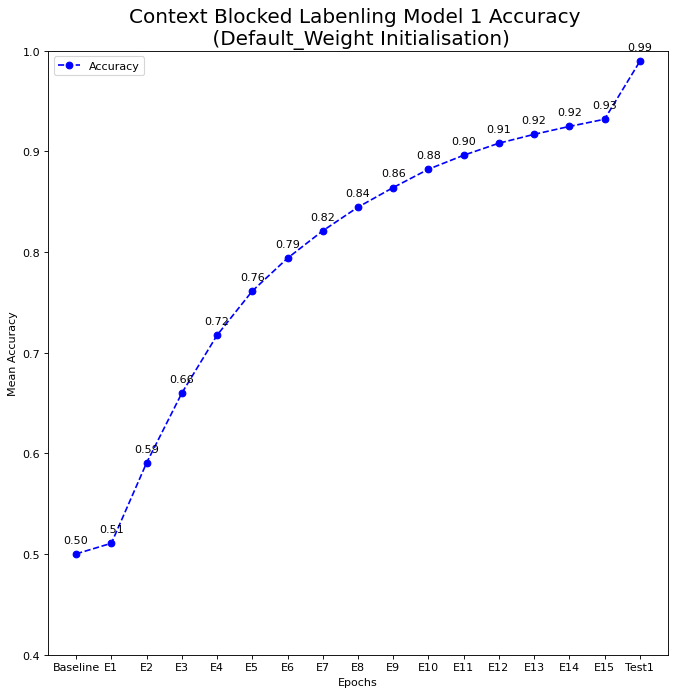

'\nThe plots can provide an indication of useful things about the training of the model, such as:\n\nIts speed of convergence over epochs (slope)\nWhether the model may have already converged (plateau of the line)\nWhether the mode may be over-learning the training data (inflection for validation line)\nAnd more\n'

In [22]:
# Plot Mean accuracy and loss
# on x axis I want "acc-before", "acc-history from different epochs", "acc-after" 
mean_acc_before = df_dict_models_1_copy.loc[:,'ACC_Before'].mean()
mean_acc_after = df_dict_models_1_copy.loc[:,'ACC_After'].mean()

mean_loss_before = df_dict_models_1_copy.loc[:,'Loss_Before'].mean()
mean_loss_after = df_dict_models_1_copy.loc[:,'Loss_After'].mean()

mean_epochs_acc=[mean_acc_before]
mean_epoch_loss=[mean_loss_before]

avearge_epoch=15
for i in range(1,avearge_epoch+1): # or (1,avearge_epoch+1) check later
    mean_epochs_acc.append(df_accuracy_1.loc[:,'E'+str(i)].mean())
    mean_epoch_loss.append(df_loss_1.loc[:,'E'+str(i)].mean())

mean_epochs_acc.append(mean_acc_after)
mean_epoch_loss.append(mean_loss_after)


# Ploting learning curev for accuracy and loss during the training and test
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
x1=['Baseline', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'Test1'] # complete X axis


y1 = mean_epochs_acc
y2 = mean_epoch_loss

# ACC Plot
plt.plot(x1, y1, linestyle='--', marker='o', color='b', label='Accuracy')
plt.ylabel('Mean Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.ylim(0.4, 1.0)
plt.title('Context Blocked Labenling Model 1 Accuracy \n (Default_Weight Initialisation)', fontsize = 18)
for x,y in zip(x1,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
# also Add acc value above each marker
# alos extend x-axis or ylim and xlime
'''
The plots can provide an indication of useful things about the training of the model, such as:

Its speed of convergence over epochs (slope)
Whether the model may have already converged (plateau of the line)
Whether the mode may be over-learning the training data (inflection for validation line)
And more
'''

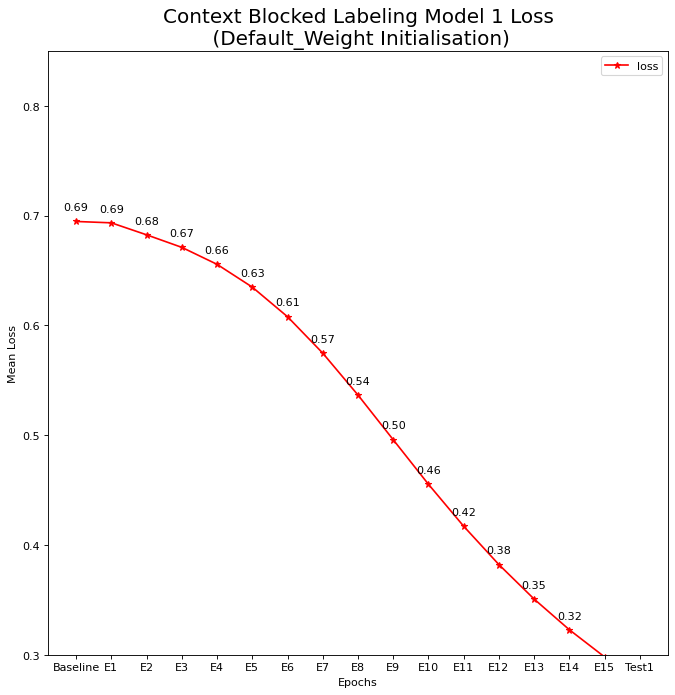

In [23]:
# Loss Plot
x2=['Baseline', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'Test1'] # complete X axis


y1 = mean_epochs_acc
y2 = mean_epoch_loss
figure(figsize=(10, 10), dpi=80)
plt.plot(x2, y2, linestyle='-', marker='*', color='r', label='loss')
plt.ylabel('Mean Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.ylim(0.3, 0.85)
plt.title('Context Blocked Labeling Model 1 Loss\n (Default_Weight Initialisation)',fontsize = 18 )
for x,y in zip(x2,y2):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()


In [24]:
# I want to sort index based on acc in epoch 15 to see if I can find different model

list_E15 = df_accuracy_1['E15'].tolist()
#print(list_E15)

sorted_index_e15 = sorted(range(len(list_E15)), key=lambda k: list_E15[k])

print('This is the accuracy of the middle model from the sorted index list of epoch 15: \n')
print(list_E15[sorted_index_e15[500]])


main_model_e15 = dict_models_1['model'][sorted_index_e15[500]]  
print(main_model_e15)

This is the accuracy of the middle model from the sorted index list of epoch 15: 

0.9375


In [25]:
# sanity check if the selected main model has the same acc as the acc_after train

#Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow\Simulation_Results//Stimulus_Blocked_Labeling//Defualt_Main_model_Stimulus_Blocked_Labeling1684402022.717474.h5')
main_model_e15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)    
print(df_dict_models_1_copy['ACC_After'][sorted_index_e15[500]])


5/5 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 1.0000
1.0


In [27]:
# SAVE THE MODEL: total_model has the average weight from all traind 50 models
CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

import time
t = time.time()
main_model_e15.save(CBL_path + 'SecondTime_Defualt_Main_model_1_Context_Blocked_Labeling' + str(t) +'.h5')

C:\Users\1234\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Making Lesion Model 1
# Make lesion by droping some weight (or put them zero)

In [ ]:
# Now I want to make lesion for my main model to decrease it performcance to 10 percent lower than the mean which is 85 or 88%


# LOAD the trained model:
# the model from E15
from tensorflow import keras
Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

loss_after_e15, acc_after_e15 = Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
print ('LOSS and ACCURACY before Lesion for trained model in Context-Blocked Labelign Model1: ')
print('\n\n')
print('LOSS:  ', round( loss_after_e15, 2))
print('ACC: ', round( acc_after_e15, 2))


In [ ]:
# function to make a lesion in a trained model

def shrink_perturb(model, percentage):
    
    # get model weight
    weight = model.get_weights()
    #np.random.seed(s)
    
    # loop thru weights of each layer
    for i, w, in enumerate(weight):
        # edit the noise based on your configuration
        
        ones_matrix = np.ones(w.shape, dtype=int)
        indices = np.random.choice(np.arange(ones_matrix.size), replace=False,size=int(ones_matrix.size * percentage))
        ones_matrix=ones_matrix.reshape(w.size,)
        ones_matrix[indices] = 0
        ones_matrix=ones_matrix.reshape(w.shape)
        
        new_w = w * ones_matrix# + noise
        weight[i] = new_w
    
    # set the new weight to the model
    model.set_weights(weight)
    
    return model

In [ ]:
tf.keras.backend.clear_session()
acc_lesion_e15=[]
loss_lesion_e15=[]

# making different lesion and comparing acc and loss
perecentage_list=[0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
input_noise_Timo=[0.02, 0.04, 0.06, 0.08, 0.1]


Dict_lesion={}
Dict_lesion['No']=[]
Dict_lesion['0.01']=[]
Dict_lesion['0.05']=[]
Dict_lesion['0.10']=[]
Dict_lesion['0.15']=[]
Dict_lesion['0.20']=[]
Dict_lesion['0.25']=[]
Dict_lesion['0.30']=[]
Dict_lesion['0.35']=[]
Dict_lesion['0.40']=[]
Dict_lesion['0.45']=[]
Dict_lesion['0.50']=[]
Dict_lesion['0.55']=[]
Dict_lesion['0.60']=[]



# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
        
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')


        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

        
        shrink_perturb(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion['0.01'].append(acc_lesion_e15[0])
    Dict_lesion['0.05'].append(acc_lesion_e15[1])
    Dict_lesion['0.10'].append(acc_lesion_e15[2])
    Dict_lesion['0.15'].append(acc_lesion_e15[3])
    Dict_lesion['0.20'].append(acc_lesion_e15[4])
    Dict_lesion['0.25'].append(acc_lesion_e15[5])
    Dict_lesion['0.30'].append(acc_lesion_e15[6])
    Dict_lesion['0.35'].append(acc_lesion_e15[7])
    Dict_lesion['0.40'].append(acc_lesion_e15[8])
    Dict_lesion['0.45'].append(acc_lesion_e15[9])
    Dict_lesion['0.50'].append(acc_lesion_e15[10])
    Dict_lesion['0.55'].append(acc_lesion_e15[11])
    Dict_lesion['0.60'].append(acc_lesion_e15[12])
    
    

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion = pd.DataFrame(Dict_lesion)
df_Dict_lesion.to_csv(CBL_path+'Lesion_wieght_Drop_on_Default_Model_1.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

y1 = np.array(y1)

In [ ]:
# Plot lesion results from wieght drop:

from matplotlib.pyplot import figure
x_lesion=['No','0.01','0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylabel('Accuracy')
plt.xlabel('Lesion Percentage')
plt.legend(loc='upper right')
plt.ylim (0.1, 1.0)
plt.title('Context Blocked Labeling Model 1 Lesion\n (weight drop)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
# function to make lesion (injectin Gussina noise to wieght)
def shrink_perturb_noise(model,scale):
    #np.random.seed(s)
    # get model weight
    weight = model.get_weights()
    
    # loop thru weights of each layer
    for i, w, in enumerate(weight):
        # edit the noise based on your configuration
        noise = np.random.normal(loc=0.0, scale=scale, size=w.shape)
        new_w = w + noise
        weight[i] = new_w
    
    # set the new weight to the model
    model.set_weights(weight)
    
    return model

In [ ]:
# making different lesion and comparing acc and loss

perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]


Dict_lesion_noise={}
Dict_lesion_noise['No']=[]
Dict_lesion_noise['0.001']=[]
Dict_lesion_noise['0.004']=[]
Dict_lesion_noise['0.008']=[]
Dict_lesion_noise['0.01']=[]
Dict_lesion_noise['0.04']=[]
Dict_lesion_noise['0.08']=[]
Dict_lesion_noise['0.1']=[]
Dict_lesion_noise['0.4']=[]
Dict_lesion_noise['0.8']=[]
Dict_lesion_noise['1.0']=[]
Dict_lesion_noise['4.0']=[]
Dict_lesion_noise['8.0']=[]


# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion_noise['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

        shrink_perturb_noise(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_noise['0.001'].append(acc_lesion_e15[0])
    Dict_lesion_noise['0.004'].append(acc_lesion_e15[1])
    Dict_lesion_noise['0.008'].append(acc_lesion_e15[2])
    Dict_lesion_noise['0.01'].append(acc_lesion_e15[3])
    Dict_lesion_noise['0.04'].append(acc_lesion_e15[4])
    Dict_lesion_noise['0.08'].append(acc_lesion_e15[5])
    Dict_lesion_noise['0.1'].append(acc_lesion_e15[6])
    Dict_lesion_noise['0.4'].append(acc_lesion_e15[7])
    Dict_lesion_noise['0.8'].append(acc_lesion_e15[8])
    Dict_lesion_noise['1.0'].append(acc_lesion_e15[9])
    Dict_lesion_noise['4.0'].append(acc_lesion_e15[10])
    Dict_lesion_noise['8.0'].append(acc_lesion_e15[11])
  

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion_noise = pd.DataFrame(Dict_lesion_noise)
df_Dict_lesion_noise.to_csv(CBL_path+'Lesion_Gussian_Noise_on_Default_Model_1.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_noise.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.001', '0.004', '0.008', '0.01', '0.04', '0.08', '0.1', '0.4', '0.8', '1.0', '4.0', '8.0']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Context Blocked Labeling Model 1 Lesion\n (Gaussian Noise injection to Parameters)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
#########################################################################################
################################# Tim Noise injection ####################################
##########################################################################################
input_noise_Timo=[0.02, 0.04, 0.06, 0.08, 0.1]

Dict_lesion_Timo={}
Dict_lesion_Timo['No']=[]
Dict_lesion_Timo['0.02']=[]
Dict_lesion_Timo['0.04']=[]
Dict_lesion_Timo['0.06']=[]
Dict_lesion_Timo['0.08']=[]
Dict_lesion_Timo['0.1']=[]

# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

    
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion_Timo['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

        
        shrink_perturb_noise(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_Timo['0.02'].append(acc_lesion_e15[0])
    Dict_lesion_Timo['0.04'].append(acc_lesion_e15[1])
    Dict_lesion_Timo['0.06'].append(acc_lesion_e15[2])
    Dict_lesion_Timo['0.08'].append(acc_lesion_e15[3])
    Dict_lesion_Timo['0.1'].append(acc_lesion_e15[4])
    

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion_Timo = pd.DataFrame(Dict_lesion_Timo)
df_Dict_lesion_Timo.to_csv(CBL_path +'Timo_Noise_on_Default_Model_1.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_Timo.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No', '0.02', '0.04', '0.06', '0.08', '0.1']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Timo Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Context Blocked Labeling Model 1 Lesion\n (Timo Gaussian Noise injection to Parameters)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# Noise Injection to input Image

In [ ]:
##########################################################################################################################
############################################### Add Noise to Input Images ################################################
##########################################################################################################################
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def input_noise_injection(Stimulus_Image_Train, std):
    '''
    inject Guassina noise to input with different std
    '''
    

    Stimulus_sizes = []
    Stimulus_inputs = []
    for s in Stimulus_Image_Train:
        #load image
        stimulus = cv2.imread(s)
        #resize image
        stimulus_resized = cv2.resize(stimulus, (30, 30))
        #convert to grayscale
        final_stimulus = cv2.cvtColor(stimulus_resized,cv2.COLOR_BGR2GRAY)
        final_stimulus = final_stimulus/255
        # add_Gussian_Noise
        mean = 0
        stddev = std
        noise = np.zeros(final_stimulus.shape, np.uint8)
        cv2.randn(noise, mean, stddev)

        # Add noise to image
        noisy_img = final_stimulus+noise
        #Reshape to one vector and scale values to [0,1]
        Stimulus_inputs.append(noisy_img.reshape(-1))
        #Plot the results
        #plt.imshow(final_stimulus, cmap=plt.get_cmap('gray'))
        #plt.show()
        #plt.imshow(noisy_img, cmap=plt.get_cmap('gray'))
        #plt.show()
        Stimulus_sizes.append(noisy_img.shape)
    Stimulus_inputs = tf.convert_to_tensor(np.array(Stimulus_inputs))
    return Stimulus_inputs


In [ ]:
Timo_list=[0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]
# making different lesion and comparing acc and loss

perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]


Dict_lesion_noise={}
Dict_lesion_noise['No']=[]
Dict_lesion_noise['0.001']=[]
Dict_lesion_noise['0.004']=[]
Dict_lesion_noise['0.008']=[]
Dict_lesion_noise['0.01']=[]
Dict_lesion_noise['0.04']=[]
Dict_lesion_noise['0.08']=[]
Dict_lesion_noise['0.1']=[]
Dict_lesion_noise['0.4']=[]
Dict_lesion_noise['0.8']=[]
Dict_lesion_noise['1.0']=[]
Dict_lesion_noise['4.0']=[]
Dict_lesion_noise['8.0']=[]


# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

    
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion_noise['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        Stimulus_inputs_noise = input_noise_injection(Stimulus_Image_Train, p)
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')

        
        loss_e15, acc_e15 = Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs_noise, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_noise['0.001'].append(acc_lesion_e15[0])
    Dict_lesion_noise['0.004'].append(acc_lesion_e15[1])
    Dict_lesion_noise['0.008'].append(acc_lesion_e15[2])
    Dict_lesion_noise['0.01'].append(acc_lesion_e15[3])
    Dict_lesion_noise['0.04'].append(acc_lesion_e15[4])
    Dict_lesion_noise['0.08'].append(acc_lesion_e15[5])
    Dict_lesion_noise['0.1'].append(acc_lesion_e15[6])
    Dict_lesion_noise['0.4'].append(acc_lesion_e15[7])
    Dict_lesion_noise['0.8'].append(acc_lesion_e15[8])
    Dict_lesion_noise['1.0'].append(acc_lesion_e15[9])
    Dict_lesion_noise['4.0'].append(acc_lesion_e15[10])
    Dict_lesion_noise['8.0'].append(acc_lesion_e15[11])
  

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion_noise = pd.DataFrame(Dict_lesion_noise)
df_Dict_lesion_noise.to_csv(CBL_path+'Input_Gussian_Noise_Injection_on_Default_Model_1.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_noise.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
# Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.001', '0.004', '0.008', '0.01', '0.04', '0.08', '0.1', '0.4', '0.8', '1.0', '4.0', '8.0']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Context Blocked Labeling Model 1 Lesion\n (Gaussian Noise injection to Inputs)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# Train Context Blocke Labeling condition with Model2
# Context Blocked Labeling Model 2

In [ ]:
###########################################################################################################
############################################# Defualt Initilizer Model 2 #############################################
###########################################################################################################

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

def Model_2_Context_Blocked_Labeling(epoch):
    '''
    the defualt initilizer is rich and good enough
    '''
    ##from numpy.random import seed
    #import tensorflow
    #seed(s)
    #tensorflow.random.set_seed(s)
    
    
    # Inputs
    import numpy as np
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.utils.vis_utils import plot_model
    from keras.models import Model
    from keras.layers import Input
    from keras.layers import Dense

    tf.keras.backend.clear_session()
   # Inputs
    Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
    Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
    Mask = keras.Input(shape=(6,), name='mask')

    # transforming stimulus and context
    Context_feature_1 = layers.Dense(100, activation="relu")(Context_Inputs)
    Context_feature_2 = layers.Dense(100, activation="relu")(Context_feature_1)
    Stimulus_feature = layers.Dense(100, activation="relu")(Stimulus_Input)

    # Mutiplication the output of previoues transformation
    Multiplication = layers.Multiply()([Stimulus_feature, Context_feature_2])
    #Muli_dens = layers.Dense(100, activation="relu")(Multiplication)

    #Output
    outputs = layers.Dense(6, activation = 'softmax')(Multiplication)
    outputs_mask = layers.Multiply()([outputs, Mask])

    # Model_1 is additive model
    model_2 = Model(inputs = [Context_Inputs, Stimulus_Input, Mask], outputs = outputs_mask, name = 'Context_Blocked_Response_Labeling_Model_2_Multipilicative')


    # maybe I need to change the learning rate in ADAM optimizer
    optimizer = keras.optimizers.Adam(lr=0.0001)
    model_2.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    
     # Evaluate the model before training with data similar to train data to see the difference before training and after training
    print('acc before train ------------------------------------')
    loss_before, acc_before = model_2.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train) # , batch_size=48

    
    # Train the model
    EPOCHS = epoch 
    history = model_2.fit(x=[Context_Input_Train, Stimulus_inputs, Mask_df], 
                        y=Labels_Train, 
                        epochs = EPOCHS, 
                        shuffle=False, 
                        batch_size=1)
    
    
    
    # Evaluate the model after training:
    print('acc after train-------------------------------------')
    loss_after, acc_after = model_2.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)

    return acc_before, loss_before, acc_after, loss_after, model_2, history

epoch=15
dict_models_2 = {}
dict_models_2['ACC_Before'] = []
dict_models_2['ACC_After'] = []
dict_models_2['Loss_Before'] = []
dict_models_2['Loss_After'] = []
dict_models_2['model'] = []

# How many epoch do I have at the end define the number of collumns in this dataframe
# Number of Epochs=? average epoch
df_accuracy_2 = pd.DataFrame(columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
                                      'E11', 'E12', 'E13', 'E14', 'E15'])

df_loss_2 = pd.DataFrame(columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
                                  'E11', 'E12', 'E13', 'E14', 'E15'])

for i in range(1000):
    print('Subject ', i)
    accuracy_before, loss_before, accuracy_after, loss_after, model, history = Model_2_Context_Blocked_Labeling(epoch)
    dict_models_2['ACC_Before'].append(accuracy_before)
    dict_models_2['ACC_After'].append(accuracy_after)
    dict_models_2['Loss_Before'].append(loss_before)
    dict_models_2['Loss_After'].append(loss_after)
    dict_models_2['model'].append(model)
    df_accuracy_2.loc[len(df_accuracy_2)] = history.history['accuracy']
    df_loss_2.loc[len(df_loss_2)] = history.history['loss']

In [ ]:
dict_models_2

In [ ]:
# make a copy from dict_model and drop the "model"


CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'


dict_models_2_copy = dict_models_2.copy()
dict_models_2_copy.pop('model')
df_dict_models_2_copy = pd.DataFrame(dict_models_2_copy)
df_dict_models_2_copy.to_csv(CBL_path +'SecondTime_Default_CBL_Model_2_History.csv')

# SAVE df_loss and df_accuracy
df_accuracy_2.to_csv(CBL_path + 'SecondTime_Default_CBL_Model_2_ACC_history.csv')
df_loss_2.to_csv(CBL_path + 'SecondTime_Default_CBL_Model_2_LOSS_history.csv')


In [ ]:
# Plot Mean accuracy and loss
# on x axis I want "acc-before", "acc-history from different epochs", "acc-after" 
mean_acc_before = df_dict_models_2_copy.loc[:,'ACC_Before'].mean()
mean_acc_after = df_dict_models_2_copy.loc[:,'ACC_After'].mean()

mean_loss_before = df_dict_models_2_copy.loc[:,'Loss_Before'].mean()
mean_loss_after = df_dict_models_2_copy.loc[:,'Loss_After'].mean()

mean_epochs_acc = [mean_acc_before]
mean_epoch_loss = [mean_loss_before]

avearge_epoch = 15
for i in range(1,avearge_epoch+1): # or (1,avearge_epoch+1) check later
    mean_epochs_acc.append(df_accuracy_2.loc[:,'E'+str(i)].mean())
    mean_epoch_loss.append(df_loss_2.loc[:,'E'+str(i)].mean())

mean_epochs_acc.append(mean_acc_after)
mean_epoch_loss.append(mean_loss_after)


# Ploting learning curev for accuracy and loss during the training and test
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
x1=['Baseline', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'Test1'] # complete X axis


y1= mean_epochs_acc
y2=mean_epoch_loss

# ACC Plot
plt.plot(x1, y1, linestyle='--', marker='o', color='b', label='Accuracy')
plt.ylabel('Mean Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.ylim(0.4, 1.0)
plt.title('Context Blocked Labeling Model 2 Accuracy \n (Default_Weight Initialisation)', fontsize = 18)
for x,y in zip(x1,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
# also Add acc value above each marker
# alos extend x-axis or ylim and xlime
'''
The plots can provide an indication of useful things about the training of the model, such as:

Its speed of convergence over epochs (slope)
Whether the model may have already converged (plateau of the line)
Whether the mode may be over-learning the training data (inflection for validation line)
And more
'''

In [ ]:
# Loss Plot
x2=['Baseline', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'Test1'] # complete X axis


y1 = mean_epochs_acc
y2 = mean_epoch_loss
figure(figsize=(10, 10), dpi=80)
plt.plot(x2, y2, linestyle='-', marker='*', color='r', label='loss')
plt.ylabel('Mean Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.ylim(0.3, 0.85)
plt.title('Context Blocked Labeling Model 2 Loss\n (Default_Weight Initialisation)',fontsize = 18 )
for x,y in zip(x2,y2):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [ ]:
# I want to sort index based on acc in epoch 15 to see if I can find different model

list_E15 = df_accuracy_2['E15'].tolist()
#print(list_E15)

sorted_index_e15 = sorted(range(len(list_E15)), key=lambda k: list_E15[k])

print('This is the accuracy of the middle model from the sorted index list of epoch 15: \n')
print(list_E15[sorted_index_e15[500]])


main_model_e15 = dict_models_2['model'][sorted_index_e15[500]]  
print(main_model_e15)

In [ ]:
# sanity check if the selected main model has the same acc as the acc_after train

#Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow\Simulation_Results//Stimulus_Blocked_Labeling//Defualt_Main_model_Stimulus_Blocked_Labeling1684402022.717474.h5')
main_model_e15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)    
print(df_dict_models_2_copy['ACC_After'][sorted_index_e15[500]])


In [ ]:
# SAVE THE MODEL: total_model has the average weight from all traind 50 models
import time
t = time.time()
main_model_e15.save(CBL_path + 'Defualt_Main_model_2_Context_Blocked_Labeling' + str(t) +'.h5')

# Making Lesion on Model 2
# Making lesion by dropping wieght

In [ ]:
# Now I want to make lesion for my main model to decrease it performcance to 10 percent lower than the mean which is 85 or 88%


# LOAD the trained model:
# the model from E15
from tensorflow import keras

Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')

loss_after_e15, acc_after_e15 = Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
print ('LOSS and ACCURACY before Lesion for trained model in Context-Blocked Labeling Model 2: ')
print('\n\n')
print('LOSS:  ', round( loss_after_e15, 2))
print('ACC: ', round( acc_after_e15, 2))

In [ ]:
# function to make a lesion in a trained model

def shrink_perturb(model, percentage):
    
    # get model weight
    weight = model.get_weights()
    #np.random.seed(s)
    
    # loop thru weights of each layer
    for i, w, in enumerate(weight):
        # edit the noise based on your configuration
        
        ones_matrix = np.ones(w.shape, dtype=int)
        indices = np.random.choice(np.arange(ones_matrix.size), replace=False,size=int(ones_matrix.size * percentage))
        ones_matrix=ones_matrix.reshape(w.size,)
        ones_matrix[indices] = 0
        ones_matrix=ones_matrix.reshape(w.shape)
        
        new_w = w * ones_matrix# + noise
        weight[i] = new_w
    
    # set the new weight to the model
    model.set_weights(weight)
    
    return model

In [ ]:
tf.keras.backend.clear_session()
acc_lesion_e15=[]
loss_lesion_e15=[]

# making different lesion and comparing acc and loss
perecentage_list=[0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
input_noise_Timo=[0.02, 0.04, 0.06, 0.08, 0.1]


Dict_lesion={}
Dict_lesion['No']=[]
Dict_lesion['0.01']=[]
Dict_lesion['0.05']=[]
Dict_lesion['0.10']=[]
Dict_lesion['0.15']=[]
Dict_lesion['0.20']=[]
Dict_lesion['0.25']=[]
Dict_lesion['0.30']=[]
Dict_lesion['0.35']=[]
Dict_lesion['0.40']=[]
Dict_lesion['0.45']=[]
Dict_lesion['0.50']=[]
Dict_lesion['0.55']=[]
Dict_lesion['0.60']=[]



# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15 model2
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')


        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')

        
        shrink_perturb(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion['0.01'].append(acc_lesion_e15[0])
    Dict_lesion['0.05'].append(acc_lesion_e15[1])
    Dict_lesion['0.10'].append(acc_lesion_e15[2])
    Dict_lesion['0.15'].append(acc_lesion_e15[3])
    Dict_lesion['0.20'].append(acc_lesion_e15[4])
    Dict_lesion['0.25'].append(acc_lesion_e15[5])
    Dict_lesion['0.30'].append(acc_lesion_e15[6])
    Dict_lesion['0.35'].append(acc_lesion_e15[7])
    Dict_lesion['0.40'].append(acc_lesion_e15[8])
    Dict_lesion['0.45'].append(acc_lesion_e15[9])
    Dict_lesion['0.50'].append(acc_lesion_e15[10])
    Dict_lesion['0.55'].append(acc_lesion_e15[11])
    Dict_lesion['0.60'].append(acc_lesion_e15[12])
    
    

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion = pd.DataFrame(Dict_lesion)
df_Dict_lesion.to_csv(CBL_path+'Lesion_wieght_Drop_on_Default_Model_2.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

y1 = np.array(y1)

In [ ]:
# Plot lesion results from wieght drop:

from matplotlib.pyplot import figure
x_lesion=['No','0.01','0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylabel('Accuracy')
plt.xlabel('Lesion Percentage')
plt.legend(loc='upper right')
plt.ylim (0.1, 1.0)
plt.title('Context Blocked Labeling Model 2 Lesion\n (weight drop)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
# function to make lesion (injectin Gussina noise to wieght)
def shrink_perturb_noise(model,scale):
    #np.random.seed(s)
    # get model weight
    weight = model.get_weights()
    
    # loop thru weights of each layer
    for i, w, in enumerate(weight):
        # edit the noise based on your configuration
        noise = np.random.normal(loc=0.0, scale=scale, size=w.shape)
        new_w = w + noise
        weight[i] = new_w
    
    # set the new weight to the model
    model.set_weights(weight)
    
    return model

In [ ]:
# making different lesion and comparing acc and loss

perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]


Dict_lesion_noise={}
Dict_lesion_noise['No']=[]
Dict_lesion_noise['0.001']=[]
Dict_lesion_noise['0.004']=[]
Dict_lesion_noise['0.008']=[]
Dict_lesion_noise['0.01']=[]
Dict_lesion_noise['0.04']=[]
Dict_lesion_noise['0.08']=[]
Dict_lesion_noise['0.1']=[]
Dict_lesion_noise['0.4']=[]
Dict_lesion_noise['0.8']=[]
Dict_lesion_noise['1.0']=[]
Dict_lesion_noise['4.0']=[]
Dict_lesion_noise['8.0']=[]


# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')

    
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion_noise['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')

        
        shrink_perturb_noise(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_noise['0.001'].append(acc_lesion_e15[0])
    Dict_lesion_noise['0.004'].append(acc_lesion_e15[1])
    Dict_lesion_noise['0.008'].append(acc_lesion_e15[2])
    Dict_lesion_noise['0.01'].append(acc_lesion_e15[3])
    Dict_lesion_noise['0.04'].append(acc_lesion_e15[4])
    Dict_lesion_noise['0.08'].append(acc_lesion_e15[5])
    Dict_lesion_noise['0.1'].append(acc_lesion_e15[6])
    Dict_lesion_noise['0.4'].append(acc_lesion_e15[7])
    Dict_lesion_noise['0.8'].append(acc_lesion_e15[8])
    Dict_lesion_noise['1.0'].append(acc_lesion_e15[9])
    Dict_lesion_noise['4.0'].append(acc_lesion_e15[10])
    Dict_lesion_noise['8.0'].append(acc_lesion_e15[11])
  

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion_noise = pd.DataFrame(Dict_lesion_noise)
df_Dict_lesion_noise.to_csv(CBL_path+'Lesion_Gussian_Noise_on_Default_Model_2.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_noise.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.001', '0.004', '0.008', '0.01', '0.04', '0.08', '0.1', '0.4', '0.8', '1.0', '4.0', '8.0']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Context Blocked Labeling Model 2 Lesion\n (Gaussian Noise injection to Parameters)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion_Timo = pd.DataFrame(Dict_lesion_Timo)
df_Dict_lesion_Timo.to_csv(CBL_path +'Timo_Noise_on_Default_Model_2.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_Timo.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure

x_lesion=['No', '0.02', '0.04', '0.06', '0.08', '0.1']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Timo Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Context Blocked Labeling Model 2 Lesion\n (Timo Gaussian Noise injection to Parameters)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# Noise injection to the input

In [ ]:
##########################################################################################################################
############################################### Add Noise to Input Images ################################################
##########################################################################################################################
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def input_noise_injection(Stimulus_Image_Train, std):
    '''
    inject Guassina noise to input with different std
    '''
    

    Stimulus_sizes = []
    Stimulus_inputs = []
    for s in Stimulus_Image_Train:
        #load image
        stimulus = cv2.imread(s)
        #resize image
        stimulus_resized = cv2.resize(stimulus, (30, 30))
        #convert to grayscale
        final_stimulus = cv2.cvtColor(stimulus_resized,cv2.COLOR_BGR2GRAY)
        final_stimulus = final_stimulus/255
        # add_Gussian_Noise
        mean = 0
        stddev = std
        noise = np.zeros(final_stimulus.shape, np.uint8)
        cv2.randn(noise, mean, stddev)

        # Add noise to image
        noisy_img = final_stimulus+noise
        #Reshape to one vector and scale values to [0,1]
        Stimulus_inputs.append(noisy_img.reshape(-1))
        #Plot the results
        #plt.imshow(final_stimulus, cmap=plt.get_cmap('gray'))
        #plt.show()
        #plt.imshow(noisy_img, cmap=plt.get_cmap('gray'))
        #plt.show()
        Stimulus_sizes.append(noisy_img.shape)
    Stimulus_inputs = tf.convert_to_tensor(np.array(Stimulus_inputs))
    return Stimulus_inputs


In [ ]:
Timo_list=[0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]
# making different lesion and comparing acc and loss

perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]


Dict_lesion_noise={}
Dict_lesion_noise['No']=[]
Dict_lesion_noise['0.001']=[]
Dict_lesion_noise['0.004']=[]
Dict_lesion_noise['0.008']=[]
Dict_lesion_noise['0.01']=[]
Dict_lesion_noise['0.04']=[]
Dict_lesion_noise['0.08']=[]
Dict_lesion_noise['0.1']=[]
Dict_lesion_noise['0.4']=[]
Dict_lesion_noise['0.8']=[]
Dict_lesion_noise['1.0']=[]
Dict_lesion_noise['4.0']=[]
Dict_lesion_noise['8.0']=[]


# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')

        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs, Mask_df], y=Labels_Train)
    Dict_lesion_noise['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        Stimulus_inputs_noise = input_noise_injection(Stimulus_Image_Train, p)
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_2_Context_Blocked_Labeling1685080466.0621128.h5')

        
        loss_e15, acc_e15 = Model_E15.evaluate(x=[Context_Input_Train, Stimulus_inputs_noise, Mask_df], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_noise['0.001'].append(acc_lesion_e15[0])
    Dict_lesion_noise['0.004'].append(acc_lesion_e15[1])
    Dict_lesion_noise['0.008'].append(acc_lesion_e15[2])
    Dict_lesion_noise['0.01'].append(acc_lesion_e15[3])
    Dict_lesion_noise['0.04'].append(acc_lesion_e15[4])
    Dict_lesion_noise['0.08'].append(acc_lesion_e15[5])
    Dict_lesion_noise['0.1'].append(acc_lesion_e15[6])
    Dict_lesion_noise['0.4'].append(acc_lesion_e15[7])
    Dict_lesion_noise['0.8'].append(acc_lesion_e15[8])
    Dict_lesion_noise['1.0'].append(acc_lesion_e15[9])
    Dict_lesion_noise['4.0'].append(acc_lesion_e15[10])
    Dict_lesion_noise['8.0'].append(acc_lesion_e15[11])
  

In [ ]:
# save Lesion dictiinary

CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'

df_Dict_lesion_noise = pd.DataFrame(Dict_lesion_noise)
df_Dict_lesion_noise.to_csv(CBL_path+'Input_Gussian_Noise_Injection_on_Default_Model_2.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_noise.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
# Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.001', '0.004', '0.008', '0.01', '0.04', '0.08', '0.1', '0.4', '0.8', '1.0', '4.0', '8.0']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Context Blocked Labeling Model 2 Lesion\n (Gaussian Noise injection to Inputs)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
CBL_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//'


In [ ]:
# Load the model:
main_model= keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Context_Blocked_Labeling//Defualt_Main_model_1_Context_Blocked_Labeling1685072702.6275558.h5')


In [ ]:
for layer in main_model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))

In [ ]:
layer_names=[]
for layer in main_model.layers:
    print(layer)
    print(layer.name)
    print(layer.weights)
    if len(layer.weights)==0:
        print('NOOOOOOOO')
    print('--------------------\n\n')
    layer_names.append(layer.name)

print(layer_names)

In [ ]:
########################### Using Truncuate solution    #############################
########################## Truncuate First Hidden Layer #############################
'''
['Stimulus_Input', 'S1_First_Hidden', 'Context_Input', 'S2_Transformation', 'C_Transformation',
'Second_Hidden_SCMultiplication', 'OutPut', 'Mask_Input', 'OutPut_Mask']
'''

    
#input
#Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
#Mask = keras.Input(shape=(6,), name='mask')

    # transforming stimulus and context
Context_feature_1 = layers.Dense(100, activation="relu")(Context_Inputs)
#Context_feature_2 = layers.Dense(100, activation="relu")(Context_feature_1)
#Stimulus_feature = layers.Dense(100, activation="relu")(Stimulus_Input)

    # Mutiplication the output of previoues transformation
#Multiplication = layers.Multiply()([Stimulus_feature, Context_feature_1])
#Muli_dens = layers.Dense(100, activation="relu")(Multiplication)

    #Output
#outputs = layers.Dense(6, activation = 'softmax')(Muli_dens)
#outputs_mask = layers.Multiply()([outputs,Mask])

    # Model_1 is additive model
trunc_model = Model(inputs=[Context_Inputs], outputs=Context_feature_1, name='Context_Blocked_Response_Labeling_Model_1_Multipilicative')



for i, layer in enumerate(trunc_model.layers):
    print('i: ',i)
    print('layer: ',layer)
    print(layer.get_weights())
    
    #if i>=1:
    layer.set_weights(main_model.layers[i].get_weights())

optimizer = keras.optimizers.Adam(lr=0.0001)
trunc_model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

#Context_Input_Train, Stimulus_inputs_noise, Mask_df
hidden_features = trunc_model.predict([Context_Input_Train])

In [ ]:
Context_Input_Train_array

In [ ]:
contexts_inp = np.argmax(Context_Input_Train_array, axis = 1)
contexts_inp

In [ ]:
stimulus= concat_train_dummy.drop(columns=['context_1','context_2','context_3','stimulus_image',
                                           'output_1','output_2','output_3','output_4','output_5','output_6'])
stimulus=np.array(stimulus)
stimulus

In [ ]:
   
#input
Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
#Mask = keras.Input(shape=(6,), name='mask')

    # transforming stimulus and context
Context_feature_1 = layers.Dense(100, activation="relu")(Context_Inputs)
#Context_feature_2 = layers.Dense(100, activation="relu")(Context_feature_1)
Stimulus_feature = layers.Dense(100, activation="relu")(Stimulus_Input)

    # Mutiplication the output of previoues transformation
Multiplication = layers.Multiply()([Stimulus_feature, Context_feature_1])
Muli_dens = layers.Dense(100, activation="relu")(Multiplication)

    #Output
#outputs = layers.Dense(6, activation = 'softmax')(Muli_dens)
#outputs_mask = layers.Multiply()([outputs,Mask])

    # Model_1 is additive model
trunc_model_2 = Model(inputs=[Context_Inputs,Stimulus_Input], outputs=Muli_dens, name='Context_Blocked_Response_Labeling_Model_1_Multipilicative')



for i, layer in enumerate(trunc_model_2.layers):
    print('i: ',i)
    print('layer: ',layer)
    print(layer.get_weights())
    
    #if i>=1:
    layer.set_weights(main_model.layers[i].get_weights())

optimizer = keras.optimizers.Adam(lr=0.0001)
trunc_model_2.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

#Context_Input_Train, Stimulus_inputs_noise, Mask_df
hidden_features_2 = trunc_model_2.predict([Context_Input_Train, Stimulus_inputs])

In [ ]:
# Now you need to extract stimulus and context combination from this 'hidden_features' matrix before giving it to PCA
# hidden_features.shape is (144, 100)
# how many context do I have? 3
# how many stimulus do I have ? 8
number_of_context=3
number_of_stimulus=8
Second_hidden_layer_size=100
contexts_inp = np.argmax(Context_Input_Train_array, axis = 1)
all_stimulus=[1,2,3,4,5,6,7,8]

aH2 = np.zeros((number_of_context, number_of_stimulus, Second_hidden_layer_size))
for nc in range(number_of_context):
    print(nc)
    id1= np.where(contexts_inp == nc)[0]
    for ns in range(number_of_stimulus):
        id2 = np.where(stimulus == all_stimulus[ns])[0]
        all_id = np.array(list(set(list(id1)) & set(list(id2))))
        aH2[nc, ns, : ] = np.mean(hidden_features_2[all_id,:], axis = 0)
        


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
n_components = 10 
svd_solver = 'full'

pca_2 = PCA(n_components)
pca_result_2 =pca_2.fit_transform(X = np.reshape(aH2, (number_of_context*number_of_stimulus, -1)))
PCA_H2 = np.reshape(pca_result_2, (number_of_context, number_of_stimulus, 10))
print('Variance PCA: {}'.format(np.sum(pca_2.explained_variance_ratio_)))


In [ ]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    print(ind)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    #plt.figure(figsize=(6, 3))

    plt.figure(dpi=1200)
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind+1, vals, color='#9ecae1')
    ax.plot(ind+1, cumvals, color='#3182bd')
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+1, vals[i]), va="bottom", ha="center", fontsize=8)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=10)
 
    ax.set_xlabel("Principal Component",fontsize=12)
    ax.set_ylabel("Variance Explained (%)",fontsize=12)
    plt.title('Context-First With Response Labeling',fontsize=16)
    plt.savefig(CBL_path+'CBL_PCA_H2.pdf')
    plt.savefig(CBL_path+'CBL_PCA_H2.png')
    
scree_plot(pca_2)